<center><h2><b>Data Science applied to online shopping behaviour</b></h2></center>

This notebook carries out an in-depth analysis of online shopping behavior with a view to identifying leading features that can be leveraged by ML models to predict a customer's propensity to buy

#**Data Overview**
-----



The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

# **Tasks & Methodology Summary**
-----


1. **Task 1** - Explore a variety of classification models to build a highly predictive classifier that predicts whether or not a customer will purchase. Models were trained on data entries corresponding to the months of June-Dec, and tested on data entries corresponding to Feb-March.

    1. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics (F1 score was used as they key metric to optimize against)
    1. Show and explain the hyper-parameter fitting process.


2.  **Task 2:** Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

    1. How many clusters are there? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).

3. **Task 3:** Consider training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, assume that the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit a classifier. Report classification performance on Feb-March data set with and without the self-labeled data. 

    1. Consider the records from Oct-Dec only, and generate the classification performance on test data
    2. Compare the above results to using the self-labeled data and training data together to see whther the classification performance on test data improves... 

In [ ]:
run_colab=1
if run_colab==1:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os

if run_colab==1: 
  data = pd.read_csv('/content/drive/MyDrive/Wk8/online_shoppers_intention.csv')
  os.chdir('/content/drive/MyDrive/Wk8/')
else: data = pd.read_csv('online_shoppers_intention.csv')

# **Task 1** Explore a variety of classification models to build a highly predictive classifier that predicts whether or not a customer will purchase. Models were trained on data entries corresponding to the months of June-Dec, and tested on data entries corresponding to Feb-March.

## 1.1) Basic exploratory data analysis (EDA)
- Appropriate univariate descriptive statistics and figures
- Appropriate bivariate descriptive statistics and figures

In [ ]:
#Data size, types and examples
print(f'data.shape={data.shape}\n')
print(data.info())
data.head(5)

data.shape=(12330, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Number of unique values per feature
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
#Check to see if any null values
data.isnull().values.any()

False

In [ ]:
#Unique values of non-numeric features
print('Unique values of feature "Month": ', data['Month'].unique())
print('Unique values of feature "VisitorType": ', data['VisitorType'].unique())
print('Unique values of feature "Weekend": ', data['Weekend'].unique())
print('Unique values of feature "Revenue": ', data['Revenue'].unique())

Unique values of feature "Month":  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values of feature "VisitorType":  ['Returning_Visitor' 'New_Visitor' 'Other']
Unique values of feature "Weekend":  [False  True]
Unique values of feature "Revenue":  [False  True]


In [ ]:
#Convert non-numeric features to numeric in df_all
df_all = data.copy()
df_all['Month'] = df_all['Month'].replace(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[2,3,5,6,7,8,9,10,11,12])
df_all['VisitorType'] = df_all['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[0,1,2])
df_all['Weekend'] = df_all['Weekend'].replace([False,True],[0,1])
df_all['Revenue'] = df_all['Revenue'].replace([False,True],[0,1])
df_all.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [ ]:
#Summary statistics for all features
df_all.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [ ]:
temp = df_all['Revenue'].sum()/len(df_all)
print(f'Percentage of records resulting in purchase (i.e. Revenue==1) = {temp}')

Percentage of records resulting in purchase (i.e. Revenue==1) = 0.15474452554744525


In [ ]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0123b0350>]],
      dtype=object)

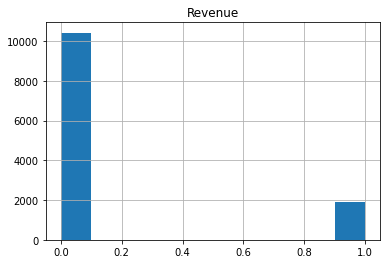

In [ ]:
#Histogram show frequency of purchases (Revenue==1) vs non-purchases (Revenue==0)
#This feature is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue==0)
df_all.hist('Revenue')

## 1.2) Advanced EDA

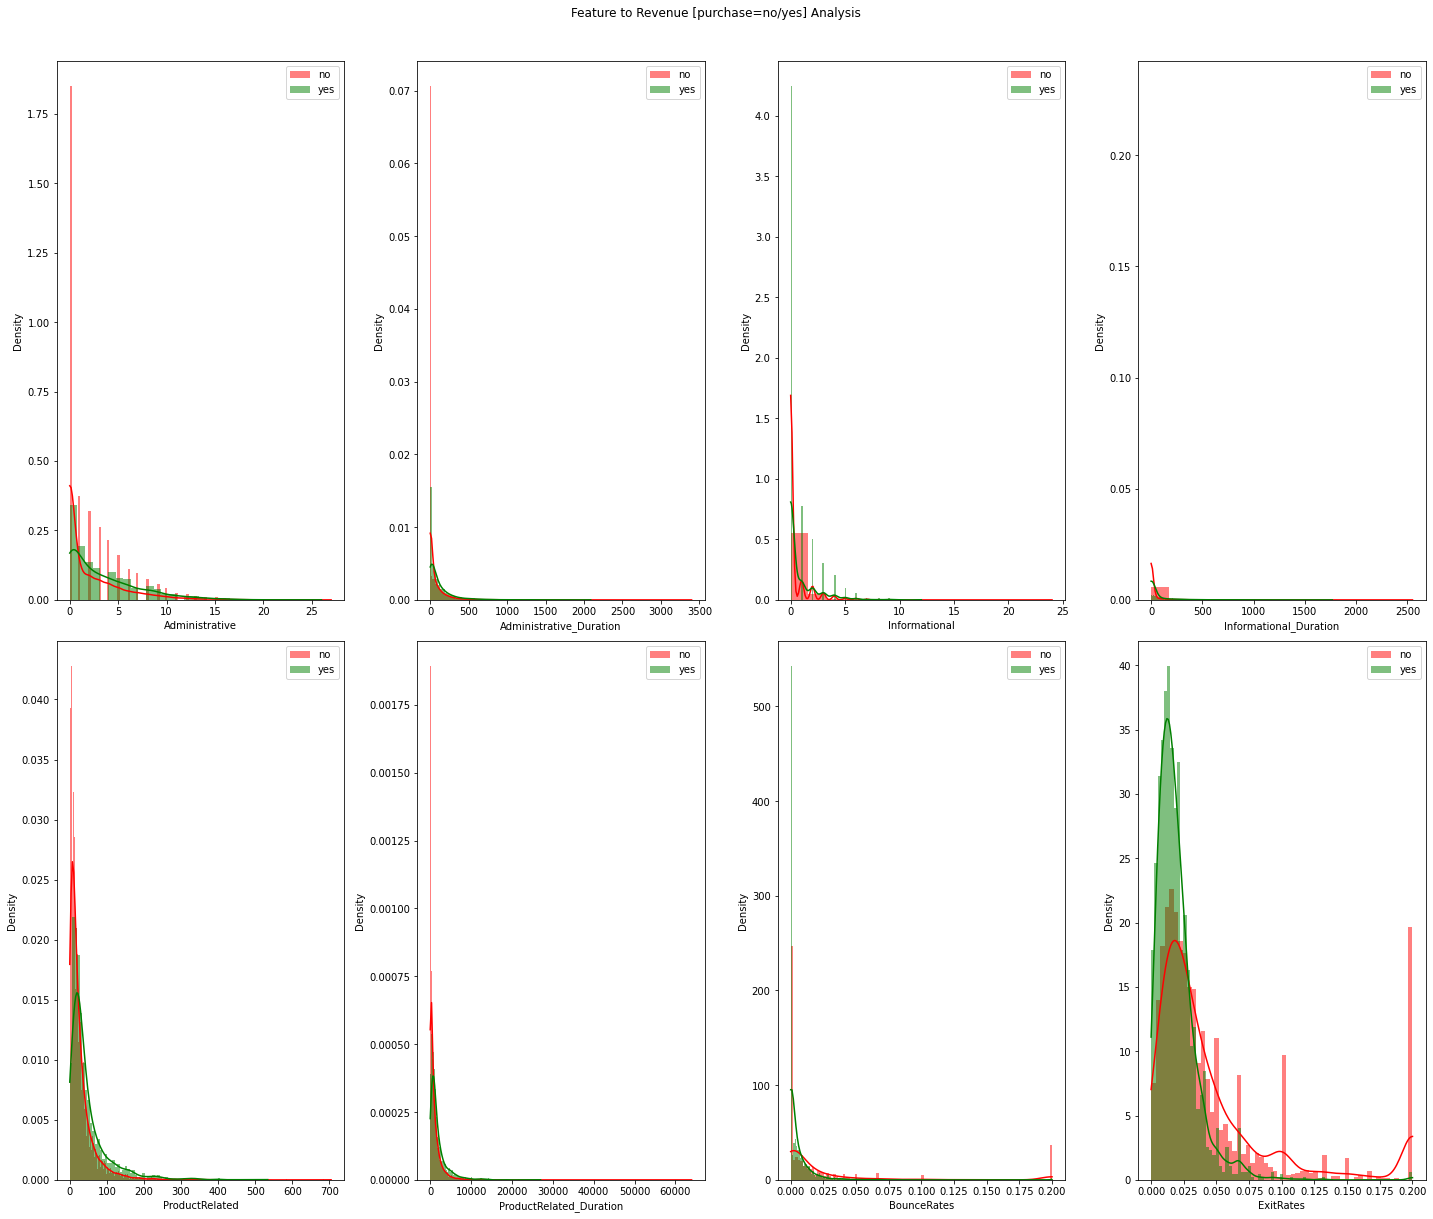

In [ ]:
#Distribution plots to visualize feature relationships to target (Revenue)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_all.columns[:8]:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.histplot(df_all[i][df_all['Revenue']==0], color='r', label = 'no', kde=True, stat="density", linewidth=0)
    sns.histplot(df_all[i][df_all['Revenue']==1], color='g', label = 'yes', kde=True, stat="density", linewidth=0)
    plt.legend(loc='best')
fig.suptitle('Feature to Revenue [purchase=no/yes] Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

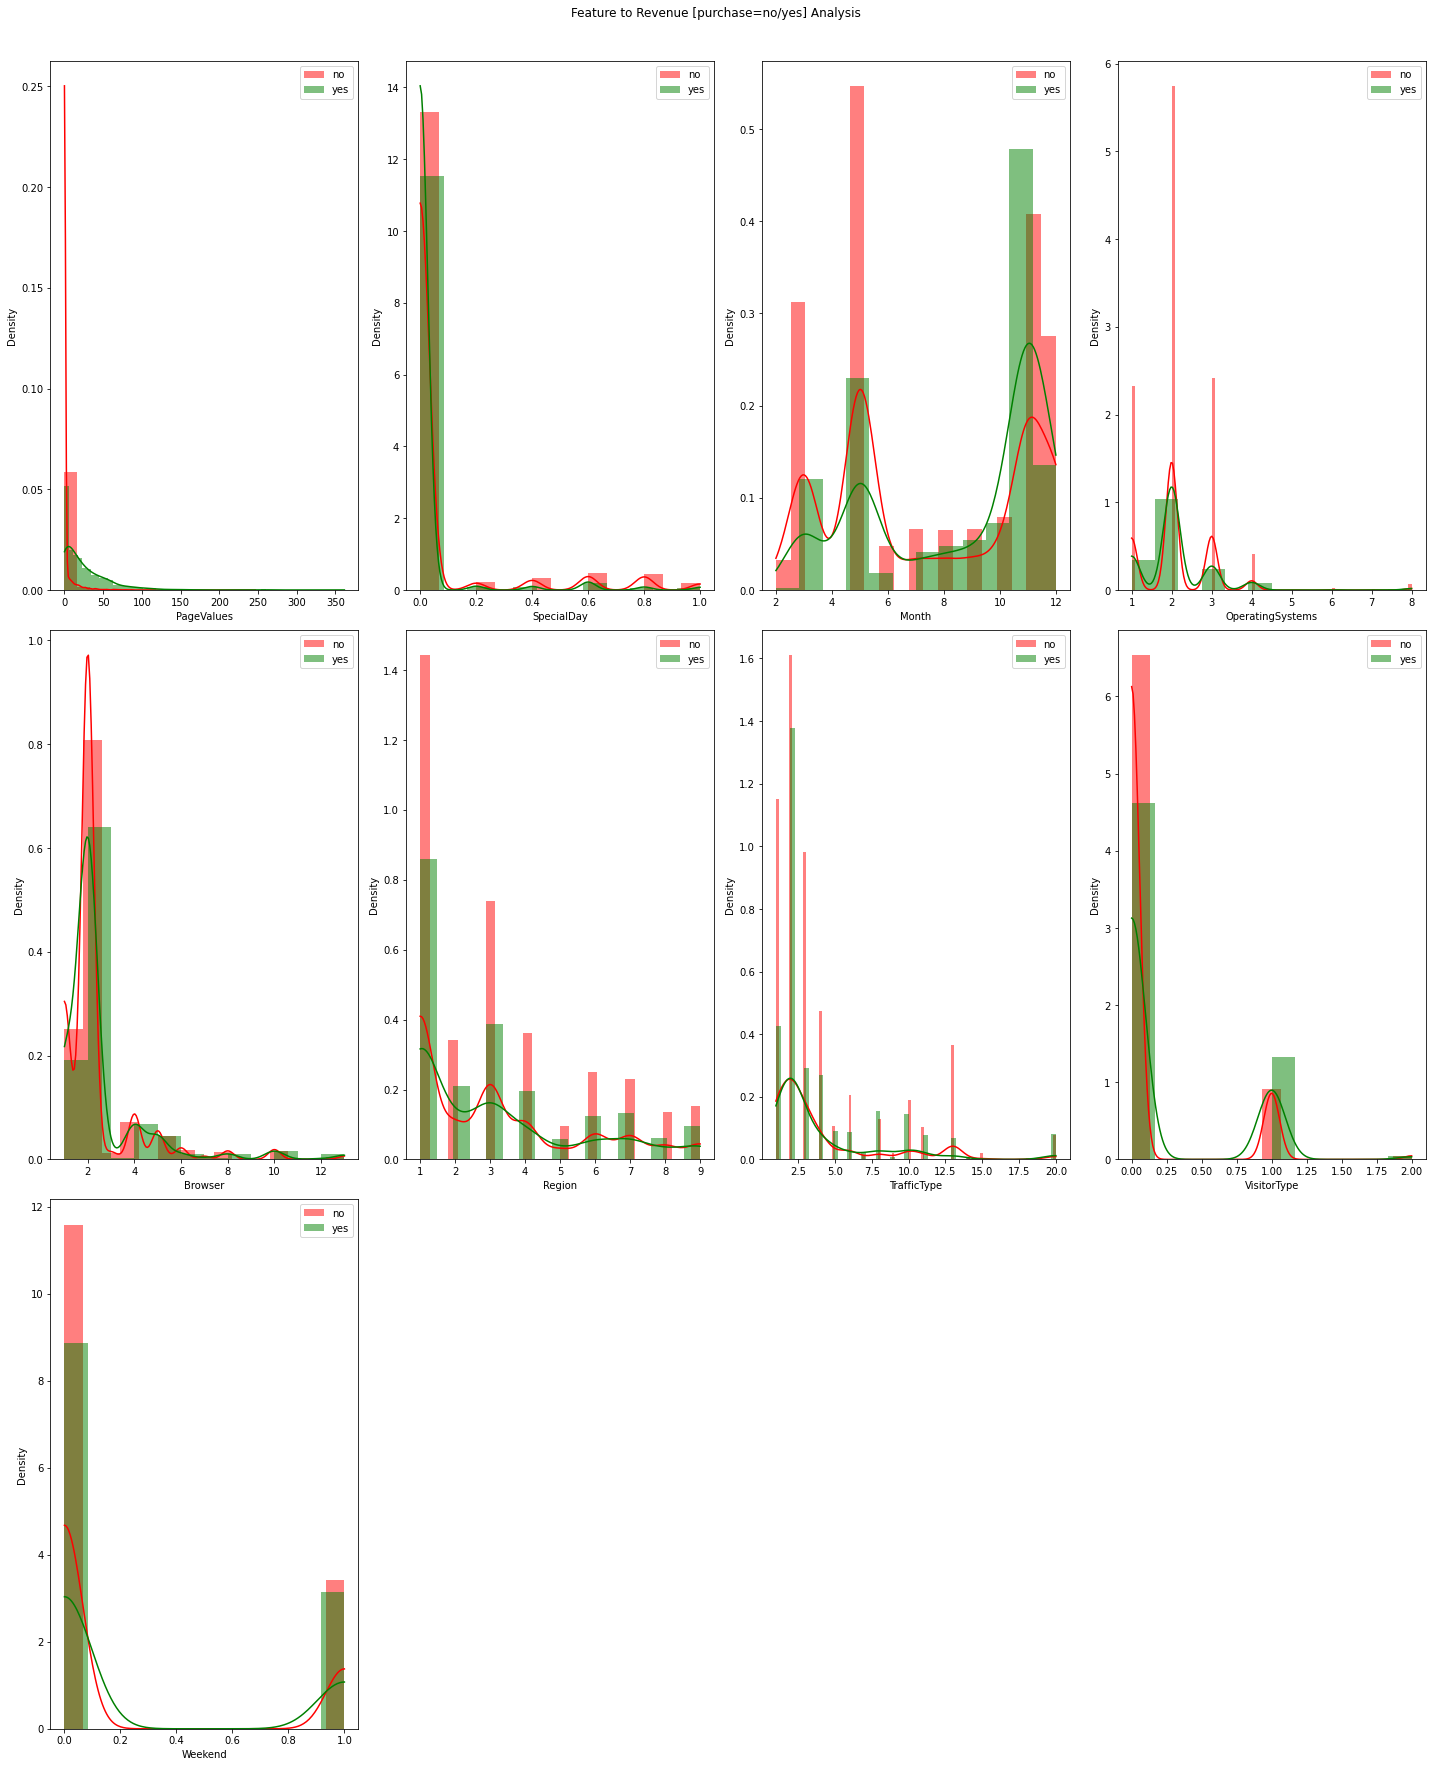

In [ ]:
#Distribution plots to visualize feature relationships to target (Revenue)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_all.columns[8:-1]:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.histplot(df_all[i][df_all['Revenue']==0], color='r', label = 'no', kde=True, stat="density", linewidth=0)
    sns.histplot(df_all[i][df_all['Revenue']==1], color='g', label = 'yes', kde=True, stat="density", linewidth=0)
    plt.legend(loc='best')
fig.suptitle('Feature to Revenue [purchase=no/yes] Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
#Initialize dataframes for X features and y target
df_X = df_all.drop(columns='Revenue')
df_y = df_all[['Revenue']]

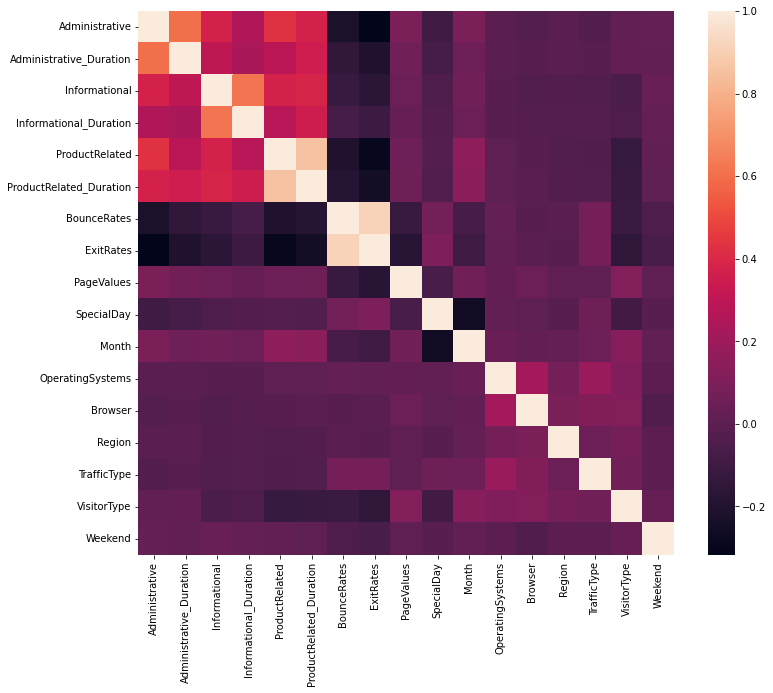

In [ ]:
#Show feature columns which have a high absolute Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_X.corr()
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

## 1.3) Train/test split
- Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March.

In [ ]:
X_features = list(df_all.columns[:-1])
X_train = df_all.loc[df_all['Month']>=6].drop(columns='Revenue').values
X_test = df_all.loc[df_all['Month']<=3].drop(columns='Revenue').values
y_train = df_all.loc[df_all['Month']>=6, 'Revenue'].values
y_test = df_all.loc[df_all['Month']<=3, 'Revenue'].values

print('--- Train & Test set summary ---\n')
print(f'len(X_features) = {len(X_features)}')
print(f'X_train = {type(X_train)}, {X_train.shape}, {X_train[0,:5]}')
print(f'X_test = {type(X_test)}, {X_test.shape}, {X_test[-1,:5]}')
print(f'y_train = {type(y_train)}, {y_train.shape}')
print(f'y_test = {type(y_test)}, {y_test.shape}')
print(f'train : test split = {round(len(X_train)/(len(X_train)+len(X_test)),3)} : {round(len(X_test)/(len(X_train)+len(X_test)),3)}')

--- Train & Test set summary ---

len(X_features) = 17
X_train = <class 'numpy.ndarray'>, (6875, 17), [0. 0. 0. 0. 1.]
X_test = <class 'numpy.ndarray'>, (2091, 17), [ 3.  46.5  0.   0.  16. ]
y_train = <class 'numpy.ndarray'>, (6875,)
y_test = <class 'numpy.ndarray'>, (2091,)
train : test split = 0.767 : 0.233


In [ ]:
# Veracity check splits - should equal m_data (12330)
print(f'len(data)={len(data)}')
len(X_test)+len(X_train)+len(df_all[df_all['Month']==5])

len(data)=12330


12330

In [ ]:
#Normalize train and test data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
print(f'X_train_norm {X_train_norm.shape}, {X_train_norm[0,:5]}')
print(f'\nmu[:5]{scaler.mean_[:5]}, \nsigma[:5]{scaler.scale_[:5]}')

X_test_norm = scaler.transform(X_test)
print(f'\nX_test_norm {X_test_norm.shape}, {X_test_norm[-1,:5]}')

X_train_norm (6875, 17), [-0.74537841 -0.49046409 -0.43222634 -0.25621675 -0.70919247]

mu[:5][ 2.65250909 90.74143386  0.57672727 39.96129892 38.15432727], 
sigma[:5][  3.55860737 185.01137216   1.33431774 155.966771    52.38962459]

X_test_norm (2091, 17), [ 0.097648   -0.23912819 -0.43222634 -0.25621675 -0.42287624]


## 1.4) Feature selection
- Find and explain important features.

Feature ranking:
1. feature 8 [PageValues] (0.293370)
2. feature 7 [ExitRates] (0.084454)
3. feature 4 [ProductRelated] (0.074678)
4. feature 5 [ProductRelated_Duration] (0.073613)
5. feature 6 [BounceRates] (0.059571)
6. feature 0 [Administrative] (0.054928)
7. feature 1 [Administrative_Duration] (0.051507)
8. feature 14 [TrafficType] (0.046793)
9. feature 13 [Region] (0.046562)
10. feature 10 [Month] (0.045498)
11. feature 11 [OperatingSystems] (0.035289)
12. feature 12 [Browser] (0.034460)
13. feature 2 [Informational] (0.032354)
14. feature 3 [Informational_Duration] (0.030197)
15. feature 16 [Weekend] (0.020541)
16. feature 15 [VisitorType] (0.016185)
17. feature 9 [SpecialDay] (0.000000)


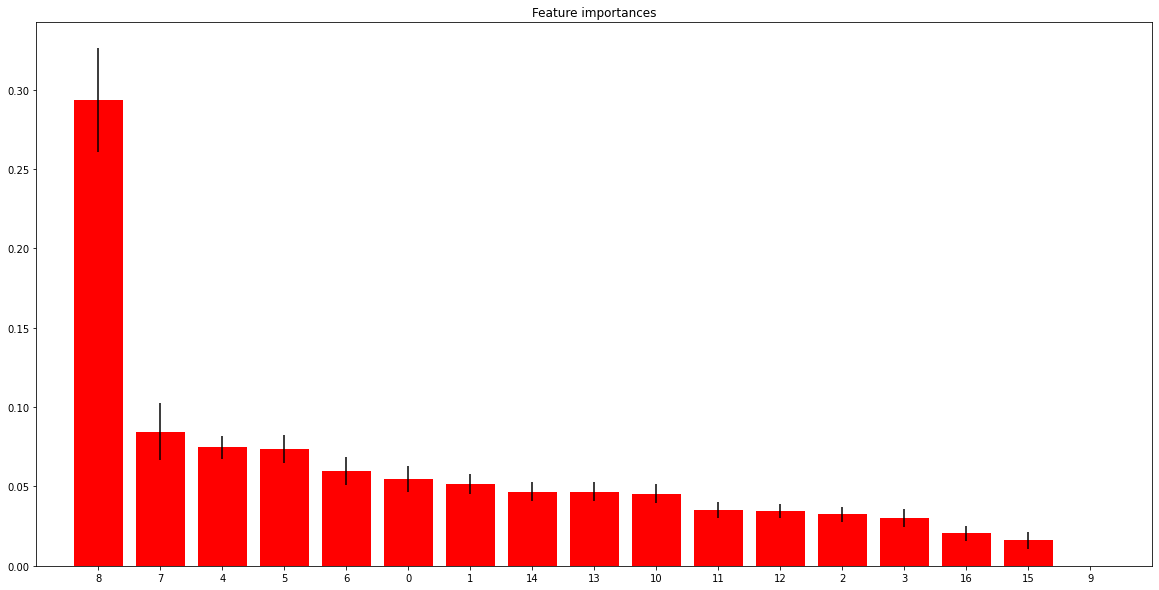

In [ ]:
# Use Random Forest to get feature ranks/importances for each feature  
from return_feature_rank_from_RF import return_feature_rank_from_RF

indices, importances = return_feature_rank_from_RF(X_train_norm, y_train, X_features)

In [ ]:
#Create list of features odered from strongest to weakest based on random forests feature ranks
ranked_features = []
for i in range(len(X_features)):
  ranked_features.append(X_features[indices[i]])
print(str(ranked_features))
print(str(indices))

['PageValues', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'Administrative', 'Administrative_Duration', 'TrafficType', 'Region', 'Month', 'OperatingSystems', 'Browser', 'Informational', 'Informational_Duration', 'Weekend', 'VisitorType', 'SpecialDay']
[ 8  7  4  5  6  0  1 14 13 10 11 12  2  3 16 15  9]


## 1.5) Model fitting
- Train Logistic Regression, SVM, Basic Neural Network, Gradient Boosted Trees and Random Forrest Classifiers against the data
- Use F1 score as key metric to judge performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import f1_score

In [ ]:
#Instantiate, train, and predict with the Logistic Regression model
regb = LogisticRegression(random_state=0, class_weight='balanced')
regb.fit(X_train_norm, y_train)
y_pred = regb.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.7296703296703296, accuracy=0.9411764705882353


In [ ]:
#Instantiate, train, and predict with the SVM LinearSVC model
svmm = LinearSVC(random_state=0, tol=1e-2,class_weight='balanced', max_iter=10000)
svmm.fit(X_train_norm, y_train)
y_pred = svmm.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.7172413793103448, accuracy=0.9411764705882353


In [ ]:
#Instantiate, train, and predict with the Neural Network model:
nn = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_norm, y_train)
y_pred = nn.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.5555555555555556, accuracy=0.8928742228598756


In [ ]:
#Instantiate, train, and predict with the Gradient Boosted Trees model:
gbt = GradientBoostingClassifier(random_state=0).fit(X_train_norm, y_train)
y_pred = gbt.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.6794520547945205, accuracy=0.9440459110473458


In [ ]:
#Instantiate, train, predict with, and evaluate a balanced random forest classifier
rfc = RandomForestClassifier(random_state=0, class_weight='balanced').fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.6038961038961038, accuracy=0.9416547106647537


In [ ]:
#Instantiate, train, and predict with the SVM SVC model
svm = SVC(random_state=0,class_weight='balanced')
svm.fit(X_train_norm, y_train)
y_pred = svm.predict(X_test_norm)
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.631868131868132, accuracy=0.9359158297465328


**Results using all features, WITHOUT hyper-parameter fitting**

| Classifier      | F1 Score | Accuracy |
|------------|------------|------------|
| LogisticRegression | 0.7296703296703296 | 0.9411764705882353 |
| SVM LinearSVC | 0.7172413793103448 | 0.9411764705882353 | 
| NN MLPClassifier | 0.5555555555555556 | 0.8928742228598756 | 
| GradientBoostingClassifier | 0.6794520547945205 | 0.9440459110473458 | 
| RandomForestClassifier | 0.6038961038961038 | 0.9416547106647537 |
| SVM SVC | 0.631868131868132 | 0.9359158297465328 |


## 1.6) Hyper-parameter fitting

In [ ]:
#Hyper-parameter fitting for Logistic Regression model
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
              }

#Instantiate, train, and predict with the Logistic Regression model:
regb = LogisticRegression(random_state=0, class_weight='balanced')
# Instantiate the grid search with the model and parameter grid
grid = GridSearchCV(regb, param_grid, scoring='f1')
# Train the grid of models
grid.fit(X_train_norm, y_train)
# Print the parameters which yield the best model performance
print(grid.best_params_)
# Extract the model with the best performance from the grid search
model = grid.best_estimator_
# Use that model to make predictions with the test data
y_pred = model.predict(X_test_norm)

acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

{'C': 10, 'solver': 'saga'}
f1_score=0.7296703296703296, accuracy=0.9411764705882353


In [ ]:
#Hyper-parameter fitting for Linear SVC model
param_grid = {'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

#Instantiate, train, and predict with the SVM SVC model:
svmm = LinearSVC(random_state=0, tol=1e-2,class_weight='balanced', max_iter=10000)
# Instantiate the grid search with the model and parameter grid
grid = GridSearchCV(svmm, param_grid, scoring='f1')
# Train the grid of models
grid.fit(X_train_norm, y_train)
# Print the parameters which yield the best model performance
print(grid.best_params_)
# Extract the model with the best performance from the grid search
model = grid.best_estimator_
# Use that model to make predictions with the test data
y_pred = model.predict(X_test_norm)

acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'C': 0.005}
f1_score=0.7172413793103448, accuracy=0.9411764705882353


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Hyper-parameter fitting for SVM SVC model
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], #['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
              'C' : [0.1, 0.5, 1, 5, 10],
              #'gamma' : [0.1, 0.5, 1, 5, 10]
              }

#Instantiate, train, and predict with the SVM SVC model:
svm = SVC(random_state=0,class_weight='balanced')
# Instantiate the grid search with the model and parameter grid
grid = GridSearchCV(svm, param_grid, scoring='f1')
# Train the grid of models
grid.fit(X_train_norm, y_train)
# Print the parameters which yield the best model performance
print(grid.best_params_)
# Extract the model with the best performance from the grid search
model = grid.best_estimator_
# Use that model to make predictions with the test data
y_pred = model.predict(X_test_norm)

acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

{'C': 5, 'kernel': 'linear'}
f1_score=0.7023121387283237, accuracy=0.9244729605866178


In [ ]:
# Hyper-parameter fitting using TPOT to find the best classifier for the data set at hand. 
# https://colab.research.google.com/drive/1lt_JKqcfnsHQ_jR5Gm2Yoa791jWfLfNY#scrollTo=0JUWCq3vsE8P
# Related Blog with description: https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9
# Scoring options: http://epistasislab.github.io/tpot/api/
!pip install tpot
from tpot import TPOTClassifier

In [ ]:
m_gen=30
m_pop=1500
sc_metric = 'f1'
export_name = 'tpot_model_pipeline - '+sc_metric+'_g'+str(m_gen)+'p'+str(m_pop)+'.py'
periodic_checkpoint = 'tpot_model_pipeline - '+sc_metric

tpot = TPOTClassifier(generations=m_gen, 
                      population_size=m_pop, 
                      verbosity=3, 
                      random_state=42, 
                      scoring=sc_metric, 
                      n_jobs=1,
                      periodic_checkpoint_folder=periodic_checkpoint)

tpot.fit(X_train_norm, y_train) 
print(tpot.score(X_test_norm, y_test))
tpot.export(export_name)

In [ ]:
#Best TPOT model using gen=30, pop=1500
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.6511026774072394
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=16, n_estimators=100)),
    XGBClassifier(learning_rate=0.001, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

model = exported_pipeline.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score={f1}, accuracy={acc}')

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


f1_score=0.7452830188679246, accuracy=0.9483500717360115


**Results using all features, WITH hyper-parameter fitting**

| Classifier      | F1 Score | Accuracy | Hyper-parameters |
|------------|------------|------------|------------|
| LogisticRegression | 0.7296703296703296 | 0.9411764705882353 | {'C': 10, 'solver': 'saga'} |
| SVM LinearSVC | 0.7172413793103448 | 0.9411764705882353 | {'C': 0.005} |
| SVM SVC | 0.7023121387283237 | 0.9244729605866178 | {'C': 5, 'kernel': 'linear'} |
| tpot_model_pipeline - f1 | 0.7452830188679246 | 0.9483500717360115 | {gen=30, pop=1500} |


## 1.7) Hyper-parameter fitting combined with Feature Selection optimization

In [ ]:
# Option 1) Iterate through features from strongest to weakest, increasing the length of the list to train on by 1 each time
# Fine tune hyperparameters and record best model
top_f1=0
top_model, top_indices, top_features, top_params = None, None, None, None

for i in range(len(X_features)):
  reduced_lst = indices[:(i+1)]
  reduced_features = ranked_features[:(i+1)]
  X_train_reduced = X_train_norm[:, reduced_lst]
  X_test_reduced = X_test_norm[:, reduced_lst]
  print(f'\n[{i}] reduced_lst={reduced_lst}, reduced_features={reduced_features}')
  print(f'[{i}] X_train_reduced={X_train_reduced.shape}, X_test_reduced={X_test_reduced.shape}')
  
  #Hyper-parameter fitting for Logistic Regression model
  param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                }

  #Instantiate, train, and predict with the Logistic Regression model:
  regb = LogisticRegression(random_state=0, class_weight='balanced')
  # Instantiate the grid search with the model and parameter grid
  grid = GridSearchCV(regb, param_grid, scoring='f1')
  # Train the grid of models
  grid.fit(X_train_reduced, y_train)
  # Print the parameters which yield the best model performance
  print(grid.best_params_)
  # Extract the model with the best performance from the grid search
  model = grid.best_estimator_
  # Use that model to make predictions with the test data
  y_pred = model.predict(X_test_reduced)
  acc = accuracy(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'[{i}]f1_score={f1}, accuracy={acc}')
  if f1>top_f1:
    top_f1=f1
    top_model=model
    top_indices=reduced_lst
    top_features=reduced_features
    top_params=grid.best_params_

print('\nBest model using feature selection and hyper-parameter fitting')
y_pred = top_model.predict(X_test_norm[:, top_indices])
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Hyer-parameters={top_params}')
print(f'top_features={top_features}, {top_indices} ({len(top_features)})')
print(f'f1_score={f1}, accuracy={acc}')


[0] reduced_lst=[8], reduced_features=['PageValues']
[0] X_train_reduced=(6875, 1), X_test_reduced=(2091, 1)
{'C': 5, 'solver': 'newton-cg'}
[0]f1_score=0.7441860465116279, accuracy=0.9473935915829746

[1] reduced_lst=[8 7], reduced_features=['PageValues', 'ExitRates']
[1] X_train_reduced=(6875, 2), X_test_reduced=(2091, 2)
{'C': 0.1, 'solver': 'liblinear'}
[1]f1_score=0.756152125279642, accuracy=0.9478718316594931

[2] reduced_lst=[8 7 4], reduced_features=['PageValues', 'ExitRates', 'ProductRelated']
[2] X_train_reduced=(6875, 3), X_test_reduced=(2091, 3)
{'C': 1, 'solver': 'newton-cg'}
[2]f1_score=0.7400881057268722, accuracy=0.9435676709708274

[3] reduced_lst=[8 7 4 5], reduced_features=['PageValues', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration']
[3] X_train_reduced=(6875, 4), X_test_reduced=(2091, 4)
{'C': 0.5, 'solver': 'newton-cg'}
[3]f1_score=0.7347826086956522, accuracy=0.9416547106647537

[4] reduced_lst=[8 7 4 5 6], reduced_features=['PageValues', 'ExitRates', 

In [ ]:
# Option 2) Iterate through features from strongest to weakest, add next feature to the list only if it increase the target metric score
# Fine tune hyperparameters and record best model
top_f1=0
top_model, top_indices, top_features, top_params = None, None, None, None

for i in range(len(X_features)):
  if i==0: 
    reduced_lst=[indices[i]]
    temp_lst=reduced_lst
  else: temp_lst=reduced_lst+[indices[i]]
  reduced_features = []
  for j in temp_lst: reduced_features.append(X_features[j])
  X_train_reduced = X_train_norm[:, temp_lst]
  X_test_reduced = X_test_norm[:, temp_lst]
  print(f'\n[{i}] reduced_lst={temp_lst}, reduced_features={reduced_features}')
  print(f'[{i}] X_train_reduced={X_train_reduced.shape}, X_test_reduced={X_test_reduced.shape}')
  
  #Hyper-parameter fitting for Logistic Regression model
  param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                }

  #Instantiate, train, and predict with the Logistic Regression model:
  regb = LogisticRegression(random_state=0, class_weight='balanced')
  # Instantiate the grid search with the model and parameter grid
  grid = GridSearchCV(regb, param_grid, scoring='f1')
  # Train the grid of models
  grid.fit(X_train_reduced, y_train)
  # Print the parameters which yield the best model performance
  print(grid.best_params_)
  # Extract the model with the best performance from the grid search
  model = grid.best_estimator_
  # Use that model to make predictions with the test data
  y_pred = model.predict(X_test_reduced)
  acc = accuracy(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'[{i}]f1_score={f1}, accuracy={acc}')
  if f1>top_f1:
    top_f1=f1
    top_model=model
    top_indices=temp_lst
    top_features=reduced_features
    top_params=grid.best_params_
    reduced_lst=temp_lst 

print('\nBest model using feature selection and hyper-parameter fitting')
y_pred = top_model.predict(X_test_norm[:, top_indices])
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Hyer-parameters={top_params}')
print(f'top_features={top_features}, {top_indices} ({len(top_features)})')
print(f'f1_score={f1}, accuracy={acc}')


[0] reduced_lst=[8], reduced_features=['PageValues']
[0] X_train_reduced=(6875, 1), X_test_reduced=(2091, 1)
{'C': 5, 'solver': 'newton-cg'}
[0]f1_score=0.7441860465116279, accuracy=0.9473935915829746

[1] reduced_lst=[8, 7], reduced_features=['PageValues', 'ExitRates']
[1] X_train_reduced=(6875, 2), X_test_reduced=(2091, 2)
{'C': 0.1, 'solver': 'liblinear'}
[1]f1_score=0.756152125279642, accuracy=0.9478718316594931

[2] reduced_lst=[8, 7, 4], reduced_features=['PageValues', 'ExitRates', 'ProductRelated']
[2] X_train_reduced=(6875, 3), X_test_reduced=(2091, 3)
{'C': 1, 'solver': 'newton-cg'}
[2]f1_score=0.7400881057268722, accuracy=0.9435676709708274

[3] reduced_lst=[8, 7, 5], reduced_features=['PageValues', 'ExitRates', 'ProductRelated_Duration']
[3] X_train_reduced=(6875, 3), X_test_reduced=(2091, 3)
{'C': 1, 'solver': 'newton-cg'}
[3]f1_score=0.7296137339055794, accuracy=0.93974175035868

[4] reduced_lst=[8, 7, 6], reduced_features=['PageValues', 'ExitRates', 'BounceRates']
[4] X_

**Results using feature selection and hyper-parameter fitting**

| Classifier      | F1 Score | Accuracy | Hyper-parameters | Features |
|------------|------------|------------|------------|------------|
| Opt1 LogisticRegression | 0.756152125279642 | 0.9478718316594931 | {'C': 0.1, 'solver': 'liblinear'} | ['PageValues', 'ExitRates'], [8 7] (2) |
| Opt2 LogisticRegression | 0.7610619469026548 | 0.9483500717360115 | {'C': 0.5, 'solver': 'newton-cg'} | ['PageValues', 'ExitRates', 'Region', 'OperatingSystems'], [8, 7, 13, 11] (4) |

# **Best Model Overall**

| Classifier      | F1 Score | Accuracy | Hyper-parameters | Features |
|------------|------------|------------|------------|------------|
| Opt2 LogisticRegression | 0.7610619469026548 | 0.9483500717360115 | {'C': 0.5, 'solver': 'newton-cg'} | ['PageValues', 'ExitRates', 'Region', 'OperatingSystems'], [8, 7, 13, 11] (4) |


# **Task 2:** Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

## 2.1) Clustering code

In [ ]:
import tensorflow as tf  
from tensorboard.plugins import projector  # tensorboard for visualizing dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb
from sklearn.cluster import KMeans

In [ ]:
# Create feature matrix
X_features = list(df_all.columns[:-1])
X = df_all.drop(columns='Revenue').values
y = df_all['Revenue'].values
df_X = df_all.drop(columns='Revenue')
df_X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1


In [ ]:
#Normalize data using StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm_df = pd.DataFrame(X_norm, columns = X_features)
print(f'X_norm {X_norm.shape}, {X_norm[0,:5]}')
print(f'\nmu[:5]{scaler.mean_[:5]}, \nsigma[:5]{scaler.scale_[:5]}')

X_norm (12330, 17), [-0.69699296 -0.4571914  -0.3964779  -0.24493051 -0.69100318]

mu[:5][ 2.31516626 80.81861054  0.50356853 34.47239793 31.73146796], 
sigma[:5][  3.3216494  176.77193867   1.27010492 140.74358671  44.47369972]


### 2.1.1) Find a smaller set of good features for this data set, i.e. select a reduced set of features for classifying Revenue=0 vs Revenue=1
    

In [ ]:
print(f'The training data currently has {X_norm_df.shape[1]} features')

The training data currently has 17 features


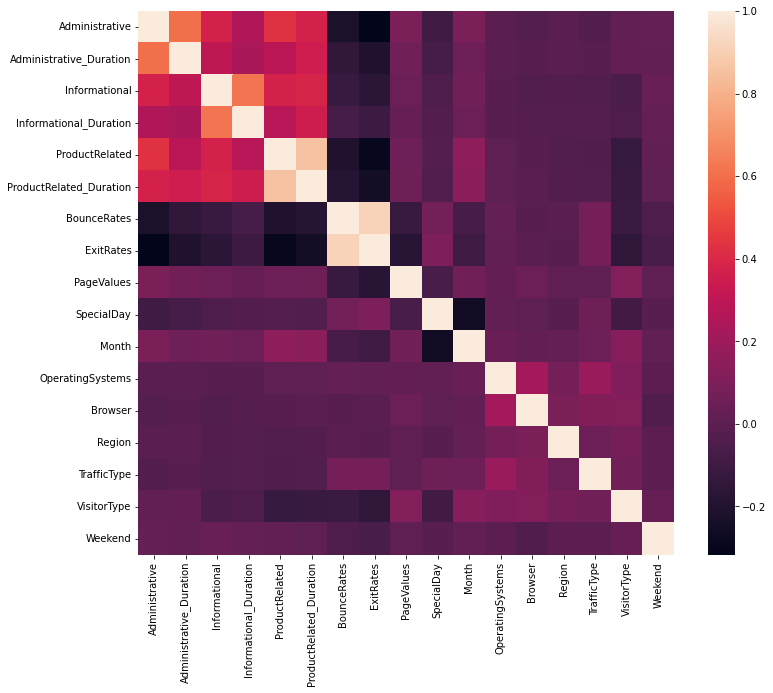

In [ ]:
# Visual inspection of features
plt.figure(figsize=(12,10))
# Compute the Pearson Correlation of each feature in the X_train
cor = X_norm_df.corr()
# Plot the correlations
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

### 2.1.2) Drop features with high correlations

Store the remaining set of features (the ones you didn't drop) in dataframes `X_train_reduced` and `X_test_reduced`

In [ ]:
### START CODE HERE ###
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = np.full((cor.shape[0],), True, dtype=bool)
# Loop over all columns
for i in range(cor.shape[0]):
    # Loop over all columns to the right of the current one
    for j in range(i+1, cor.shape[0]):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8, or no correlation 0 value...
        if (np.abs(cor.iloc[i,j]) >= 0.8):
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
selected_columns = X_norm_df.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
X_norm_df_reduced = X_norm_df[selected_columns]
print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {X_norm_df.shape[1]} features. The new df has {X_norm_df_reduced.shape[1]} features.')
X_norm_df_reduced.head()

The following columns are present in the new data:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')
The old data had 17 features. The new df has 15 features.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,-0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,-0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,-0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,-0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,-0.401025,1.816360


In [ ]:
#Set data sets to reduced sets
X_norm_df = X_norm_df_reduced
X_norm = X_norm_df.values
X_features_reduced = list(X_norm_df.columns)

Feature ranking:
1. feature 6 [PageValues] (0.376152)
2. feature 4 [ProductRelated] (0.093341)
3. feature 5 [BounceRates] (0.072440)
4. feature 1 [Administrative_Duration] (0.063655)
5. feature 0 [Administrative] (0.063170)
6. feature 8 [Month] (0.056896)
7. feature 12 [TrafficType] (0.053110)
8. feature 11 [Region] (0.051140)
9. feature 3 [Informational_Duration] (0.034013)
10. feature 10 [Browser] (0.033982)
11. feature 9 [OperatingSystems] (0.033769)
12. feature 2 [Informational] (0.033260)
13. feature 13 [VisitorType] (0.015733)
14. feature 14 [Weekend] (0.012610)
15. feature 7 [SpecialDay] (0.006728)


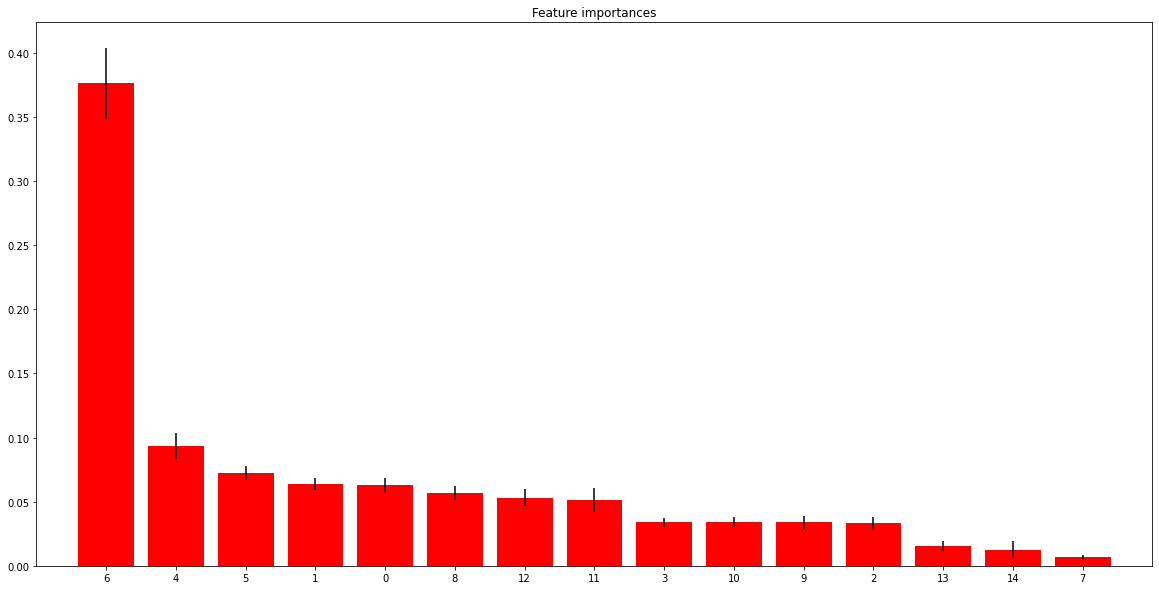

In [ ]:
# Use Random Forest to get feature ranks/importances for each feature  
from return_feature_rank_from_RF import return_feature_rank_from_RF

indices, importances = return_feature_rank_from_RF(X_norm, y, X_features_reduced)

In [ ]:
# Extract the indices corresponding to a feature importance >= 0.04... there appears to be a drop off in feature importances below this figure based on the chart above
idx = np.where(importances >= 0.04)
# Extract the names of the associated feature columns
selected_columns = X_norm_df.columns[idx]
print('The retained columns/features were:')
print(selected_columns)
X_train = X_norm_df[selected_columns].values

The retained columns/features were:
Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'BounceRates', 'PageValues', 'Month', 'Region', 'TrafficType'],
      dtype='object')


In [ ]:
print('The shape of X_train is', X_train.shape)

The shape of X_train is (12330, 8)


In [ ]:
#Apply dimensionality reduction using PCA
pca = PCA(n_components=5)
X_reduced_PCA = pca.fit_transform(X_train)
print(X_reduced_PCA.shape)

(12330, 5)


In [ ]:
#Apply dimensionality reduction using t-SNE
import sklearn.manifold
tsne_op = sklearn.manifold.TSNE(n_components=3, perplexity=5)
X_reduced_tSNE = np.array(tsne_op.fit_transform(X_train))
print(X_reduced_tSNE.shape)

(12330, 3)


- Now we'll use the [KMeans module](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) in sklearn.cluster, to fit Kmeans clusterings of the data. 
- We don't know the best value of K (the number of clusters) *a priori*, so we'll try all values of $k \in [1, 20]$. We can automate this with the [KElbowVisualizer module](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) of the Yellowbrick visualization library.

In [ ]:
!pip install --upgrade yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fae9ba69d50>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=19,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

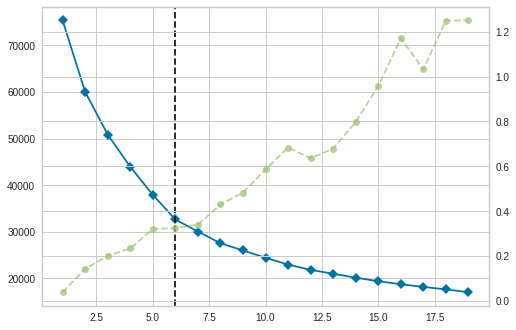

In [ ]:
# Fit the KElbow visualizer for the PCA-reduced data
# Instantiate the clustering model and visualizer
kmeans_PCA = KMeans()
visualizer_PCA = KElbowVisualizer(kmeans_PCA, k=(1,20))
# Fit the visualizer to the reduced features data
visualizer_PCA.fit(X_reduced_PCA)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fae9b951390>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=19,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

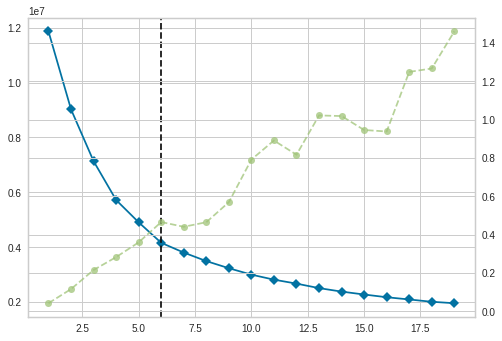

In [ ]:
# Fit the KElbow visualizer for the t-SNE-reduced data
# Instantiate the clustering model and visualizer
kmeans_tSNE = KMeans()
visualizer_tSNE = KElbowVisualizer(kmeans_tSNE, k=(1,20))
# Fit the visualizer to the reduced features data
visualizer_tSNE.fit(X_reduced_tSNE)

- Pick a value of K to use for clustering PCA, based on the above plots. 
- Generate an array `cluster_ids` that labels each datapoint in `X_reduced_PCA` with the cluster ID (0...K-1) that Kmeans assigns to it, when it is fit with that value of K.

### 2.1.3) Identify and decide on number of clusters 

In [ ]:
k_pca = 6  # Based on elbow points in above graphs
# Instantiate the clustering model
model = KMeans(n_clusters = k_pca)
# Assign the points in the reduced dataset to clusters
cluster_ids = np.array(model.fit_predict(X_reduced_PCA))
print('The unique cluster ids are ', np.unique(cluster_ids))

The unique cluster ids are  [0 1 2 3 4 5]


In [ ]:
# Create a new version of the feature-reduced data that has these cluster ids in it, and save this as a .csv file to disk:
selected_columns = ['Administrative', 'Administrative_Duration', 'ProductRelated',
       'BounceRates', 'PageValues', 'Month', 'Region', 'TrafficType']
#^ Columns selected after the first step of Random Forest feature pruning, 
temp_df = pd.DataFrame(df_all[selected_columns])
temp_df['Revenue'] = df_all.iloc[:,-1]
temp_df['ClusterID'] = cluster_ids
temp_df.to_csv('Clustered_data.csv', index=False)
temp_df.head()

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,Month,Region,TrafficType,Revenue,ClusterID
0,0,0.0,1,0.20,0.0,2,1,1,0,3
1,0,0.0,2,0.00,0.0,2,1,2,0,0
2,0,0.0,1,0.20,0.0,2,9,3,0,3
3,0,0.0,2,0.05,0.0,2,2,4,0,0
4,0,0.0,10,0.02,0.0,2,1,4,0,0


## 2.2) Return plots and cluster images generated for the data.

In [ ]:
#Load the data with clustering labels
X_train = pd.read_csv("Clustered_data.csv")
X=X_train.iloc[:,0:-2].values
X_train.head()

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,Month,Region,TrafficType,Revenue,ClusterID
0,0,0.0,1,0.20,0.0,2,1,1,0,3
1,0,0.0,2,0.00,0.0,2,1,2,0,0
2,0,0.0,1,0.20,0.0,2,9,3,0,3
3,0,0.0,2,0.05,0.0,2,2,4,0,0
4,0,0.0,10,0.02,0.0,2,1,4,0,0


In [ ]:
#version 1
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(labels, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for label in labels:
            f.write('{}\n'.format(label))


In [ ]:
## Get working directory
PATH = os.getcwd()
## Path to save the embedding and checkpoints generated
try:
  os.mkdir(PATH + '/project-tensorboard/')
  LOG_DIR = PATH + '/project-tensorboard/log-1'
  os.mkdir(LOG_DIR)
except: FileExistsError:None

In [ ]:
META_DATA_FNAME = 'meta_cos_reduction1.tsv'  # Labels will be stored here
EMBEDDINGS_TENSOR_NAME = 'sample_data_cos_reduction1'
EMBEDDINGS_FPATH = os.path.join(LOG_DIR, EMBEDDINGS_TENSOR_NAME + '.ckpt')
STEP = 0

register_embedding(EMBEDDINGS_TENSOR_NAME, META_DATA_FNAME, LOG_DIR)
save_labels_tsv(cluster_ids, META_DATA_FNAME, LOG_DIR) #version 1

In [ ]:
tf.compat.v1.disable_eager_execution()
tensor_embeddings = tf.Variable(X, name=EMBEDDINGS_TENSOR_NAME)
sess = tf.compat.v1.InteractiveSession()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()
saver.save(sess, EMBEDDINGS_FPATH, STEP)
sess.close()

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

In [ ]:
#%reload_ext tensorboard
#!kill 1829
#LOG_DIR

In [ ]:
%tensorboard --logdir project-tensorboard/log-1

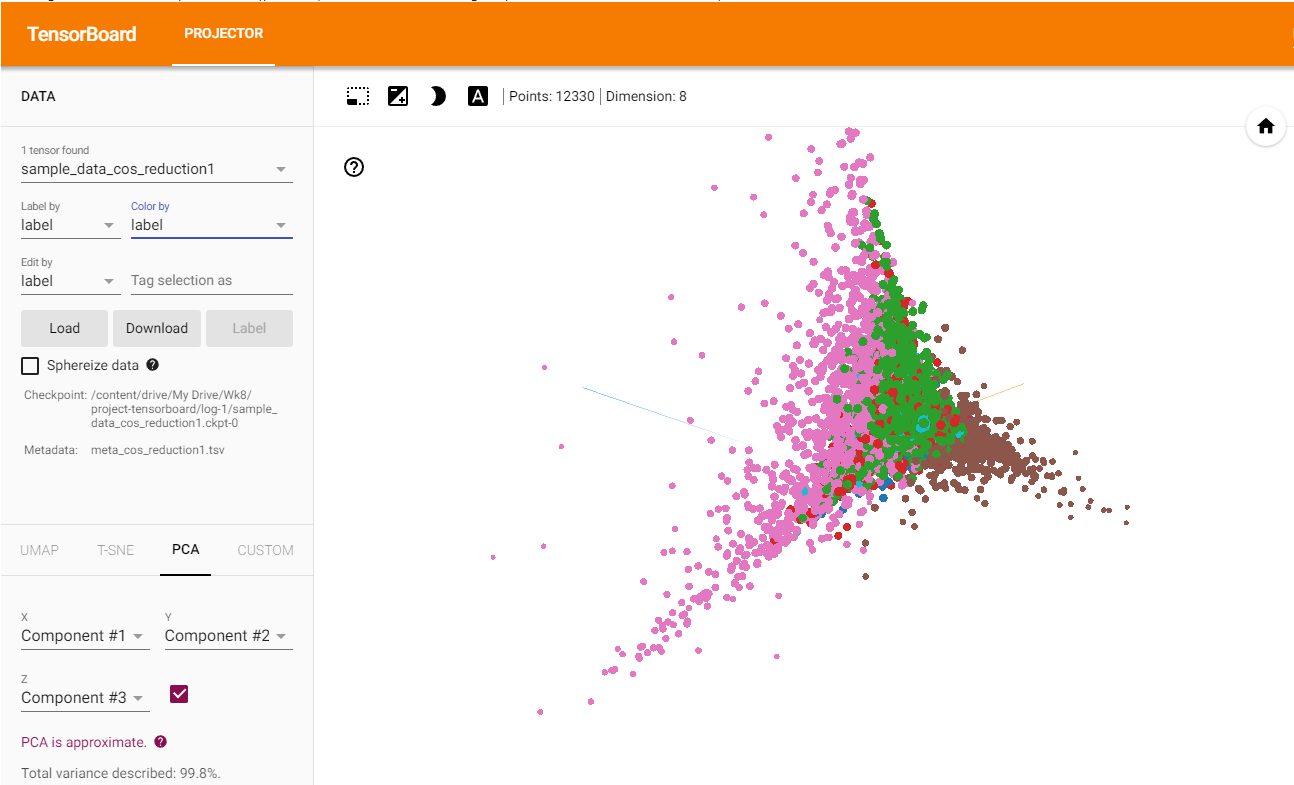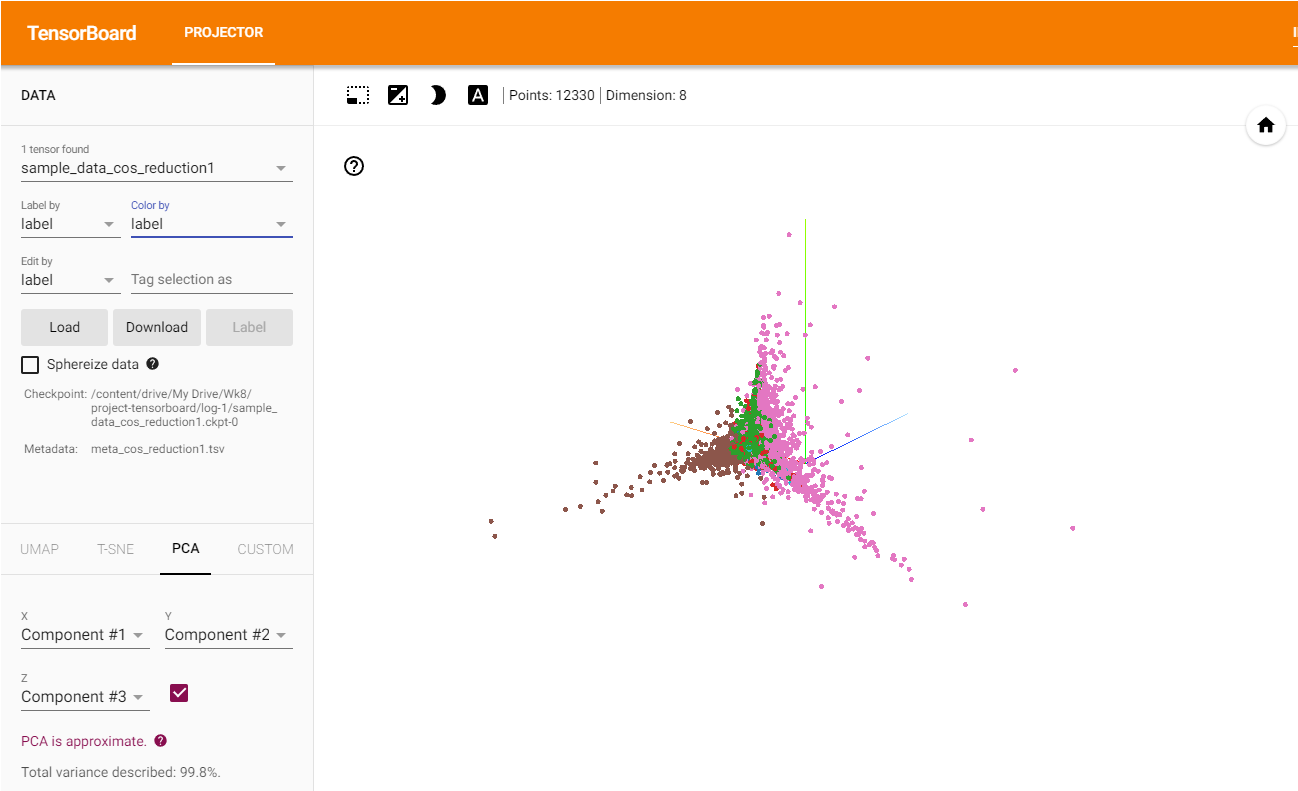

## 2.3) Cluster Analysis

In [ ]:
column_values = X_train["ClusterID"].values.ravel()
unique_cluster_ids_unsorted = np.array(pd.unique(column_values))
unique_cluster_ids = np.sort(unique_cluster_ids_unsorted)

In [ ]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(np.shape(unique_cluster_ids))
representation_percentage = np.zeros(np.shape(unique_cluster_ids))
# Loop through the clusters
for index, item in enumerate(unique_cluster_ids):
    locations = X_train.loc[X_train['ClusterID'] == item]
    purchase = locations.loc[locations['Revenue']==1]
    representation_percentage[index] = round((locations.shape[0]/X_train.shape[0])*100, 2)
    purchase_percentage[index] = round((purchase.shape[0]/locations.shape[0])*100, 2)

Representation Percentage= [29.04 16.59 10.34 13.15 26.72  4.14]
Purchase Percentage= [ 8.52 12.71 26.2   3.08 16.42 81.8 ]


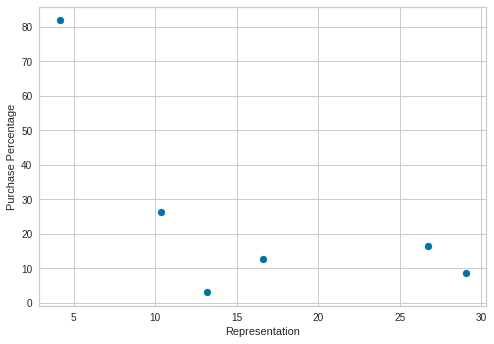

In [ ]:
print('Representation Percentage=',(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [ ]:
total_purchase=X_train.loc[X_train['Revenue']==1]
purchase_distrib=total_purchase.shape[0]/X_train.shape[0]
print(f'Overall purchase ratio: {purchase_distrib*100}')

Overall purchase ratio: 15.474452554744525


### 2.3.1) What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. 

- Clusters 2 & 5 (with 10.34% & 4.14% population representation) represent sessions with the highest purchase ratios (26.2 & 81.8%)... customers in these clusters are more likely to buy
- Clusters 0 & 3 (with 29.04% & 13.5% population representation) represent users that are less likely to purchase @ 8.52% & 3.08%
- Clusters 5 is the smallest cluster with 4.14% population representation.  The rest are somewhat balanced in terms of representation percentage
- Clusters 1 & 4 are closest to the overall averages in terms of representation and purchase percentages 

### 2.3.2) Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).

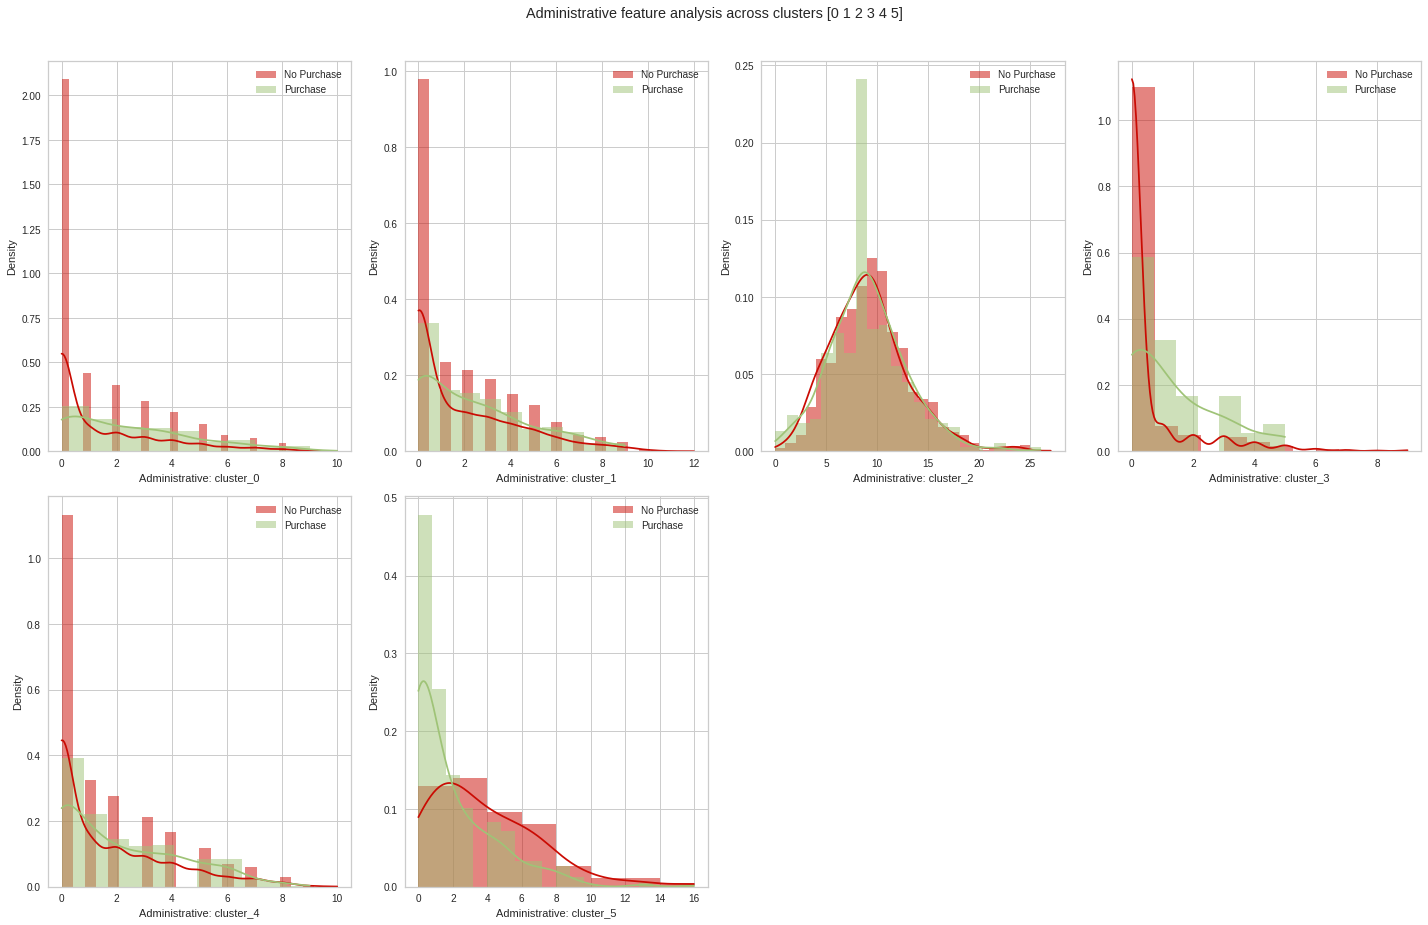

In [ ]:
# Feature 0 distribution in clusters
fid = 0

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- "Administrative" represents the density of users visiting pages of this category
- The above plots highlight that clusters 2 & 5 have relatively higher densities of "Administrative" pages accessed by users.
- Based on the earlier purchase ratio analyis, clusters 2 & 5 also have higher than average purchase ratios.  This may suggest that sessions belonging to clusters 2 & 5 relate to new & existing customers, as they would have more administration tasks than non-purchasers
- Further, comparing the denisties between clusters 2 & 5, we can see that sesions in cluster 2 are associated with more administrative pages than those in cluster 5.  This could suggest that sessions in cluster 2 belong to new customers (versus existing customers in cluster 5), as they would have more administrative tasks in terms of setup & admin activities etc.
- The above plots also highlight that clusters with the lowest likelihood of purchasing (0 & 3 as per prior purchase ratio analysis) do not have high densities of users accessing administrative pages - intuitively, this makes sense 

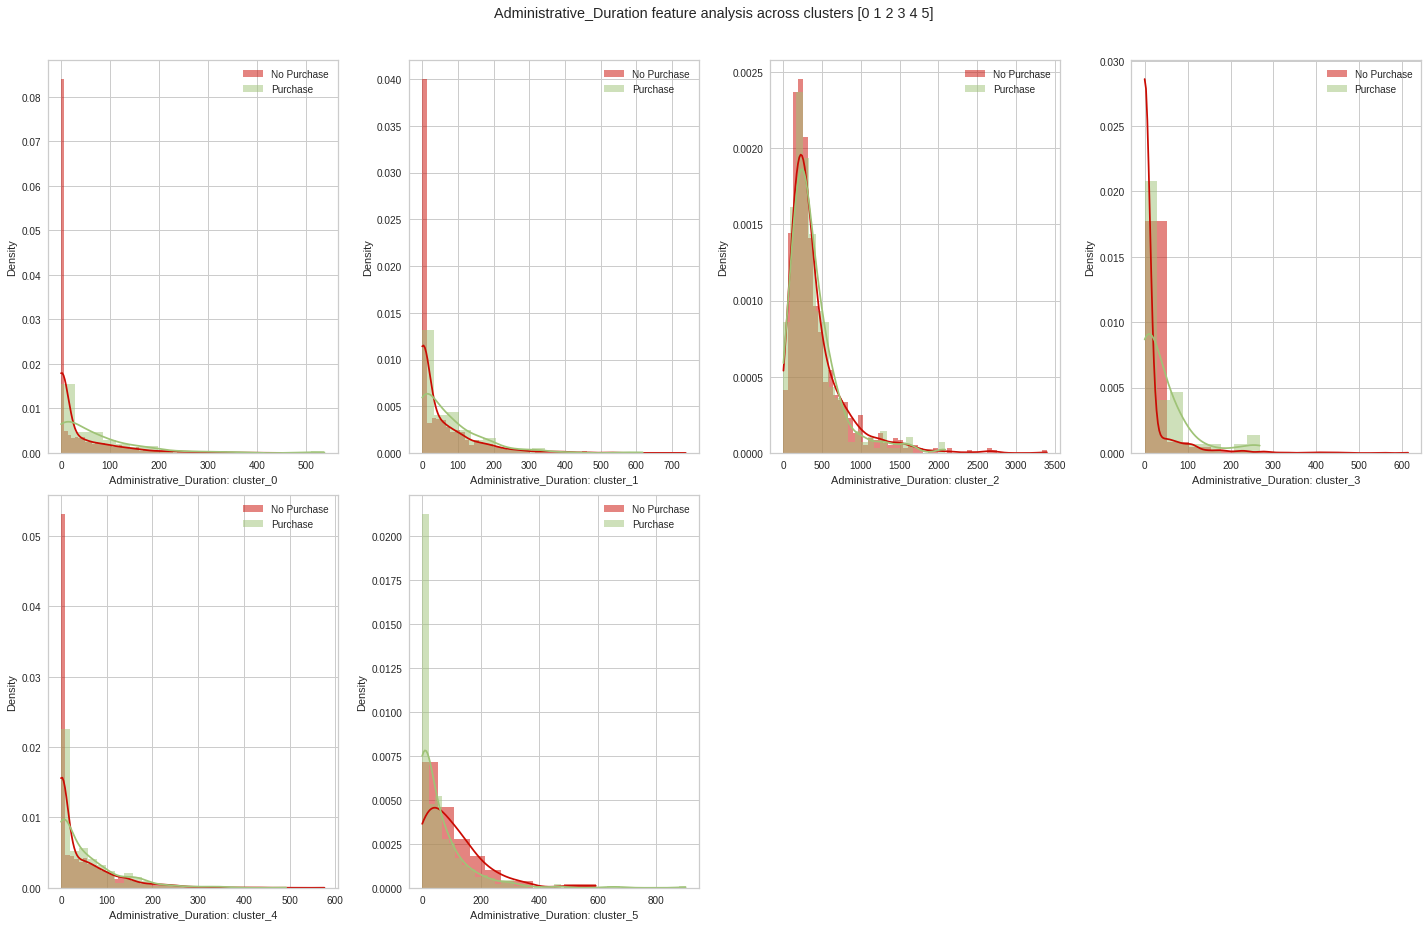

In [ ]:
# Feature 1 distribution in clusters
fid = 1

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- "Administrative_Duration" represents density of user time spent on pages of this category
- As per analysis above for "Administrative" feature

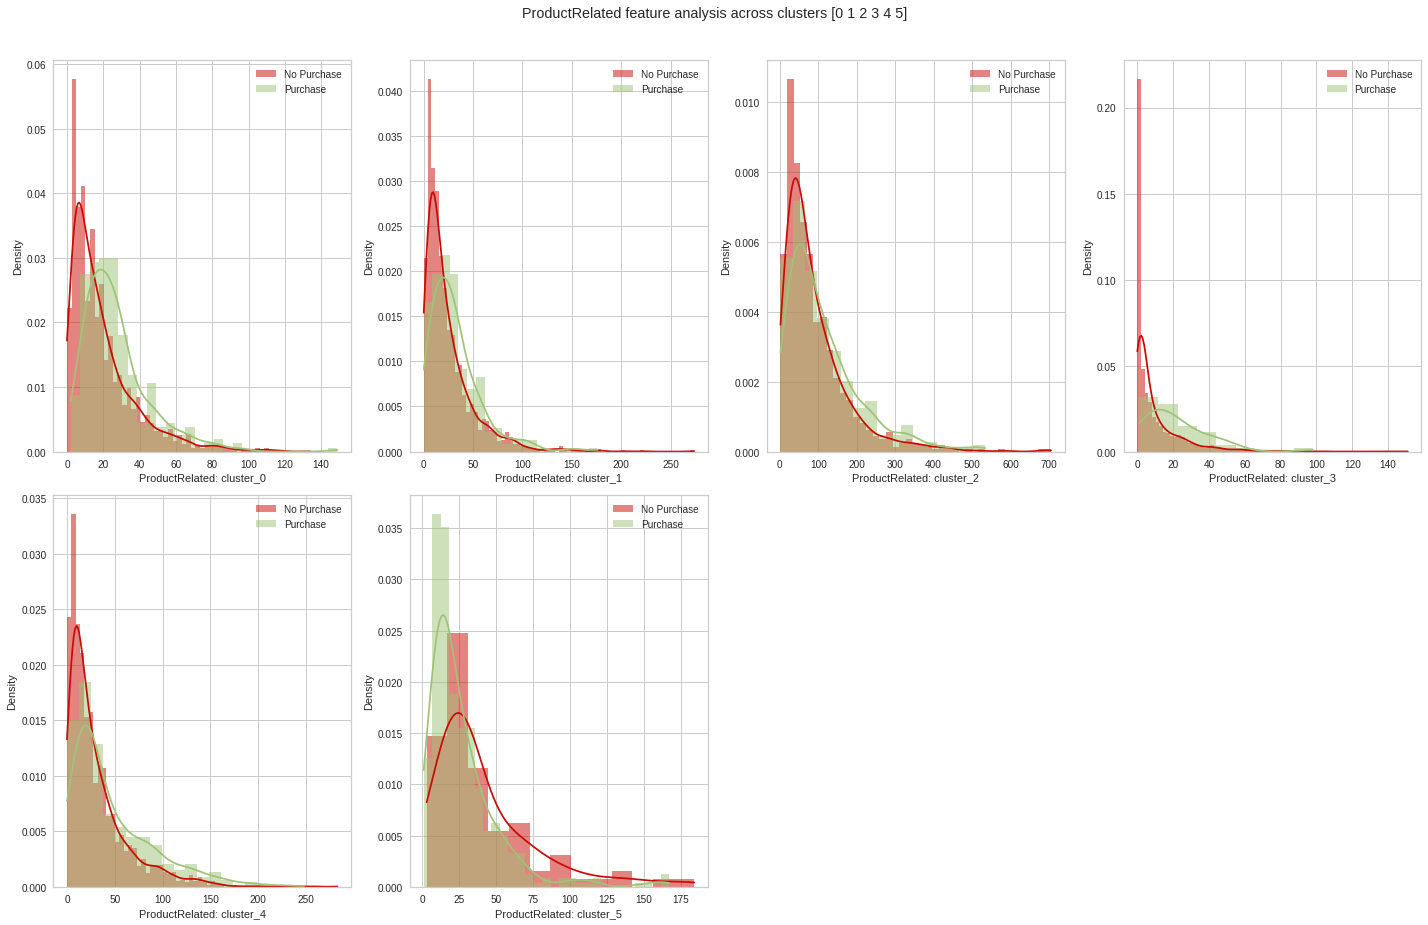

In [ ]:
# Feature 2 distribution in clusters
fid = 2

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- "ProductRelated" represents the density of users visiting pages of this category
- As expected, the above plots highlight that the top purchasing clusters (2 & 5) have the highest densities of "ProductRelated" pages accessed by users.
- Also as expected, clusters 0 & 3 (lower propensity to purchase) have much lower densities of sessions accessing "ProductRelated" pages
- Interestingly, there are sections in all the above plots where the density of purchasers (green line/bar) exceeds the non-purchasers (red line/bar).  On average, purchasing sessions only make up 15% of the total data.  Areas with higher purchasers than non-purchasers are thus interesting.  In this case it may suggest that across all the clusters there are pockets of users that once they have accessed a certain amount of product related pages, become purchasers.  These customers are probably more likely to purchase based on their own product research, as opposed to branding.
- The above plots also show that all of the clusters have a portion of sessions making purchases even when "ProductRelated" pages accessed=0.  These customers are likely making purchases based on trust/reputation, and are thus more likely to be brand conscious.
- In the case of cluster 5, when "ProductRelated" pages accessed=0, there is actually a higher portion of purchasers than non-purchasers... this adds further weight to the suggestion that cluster 5 represents existing customers - where there is likely to be more trust and brand awareness
- Based on all the above, it seems to be the case that no single cluster represents brand conscious customers or product/research focussed customers.  Rather there appears to be a mixture of both across all the clusters

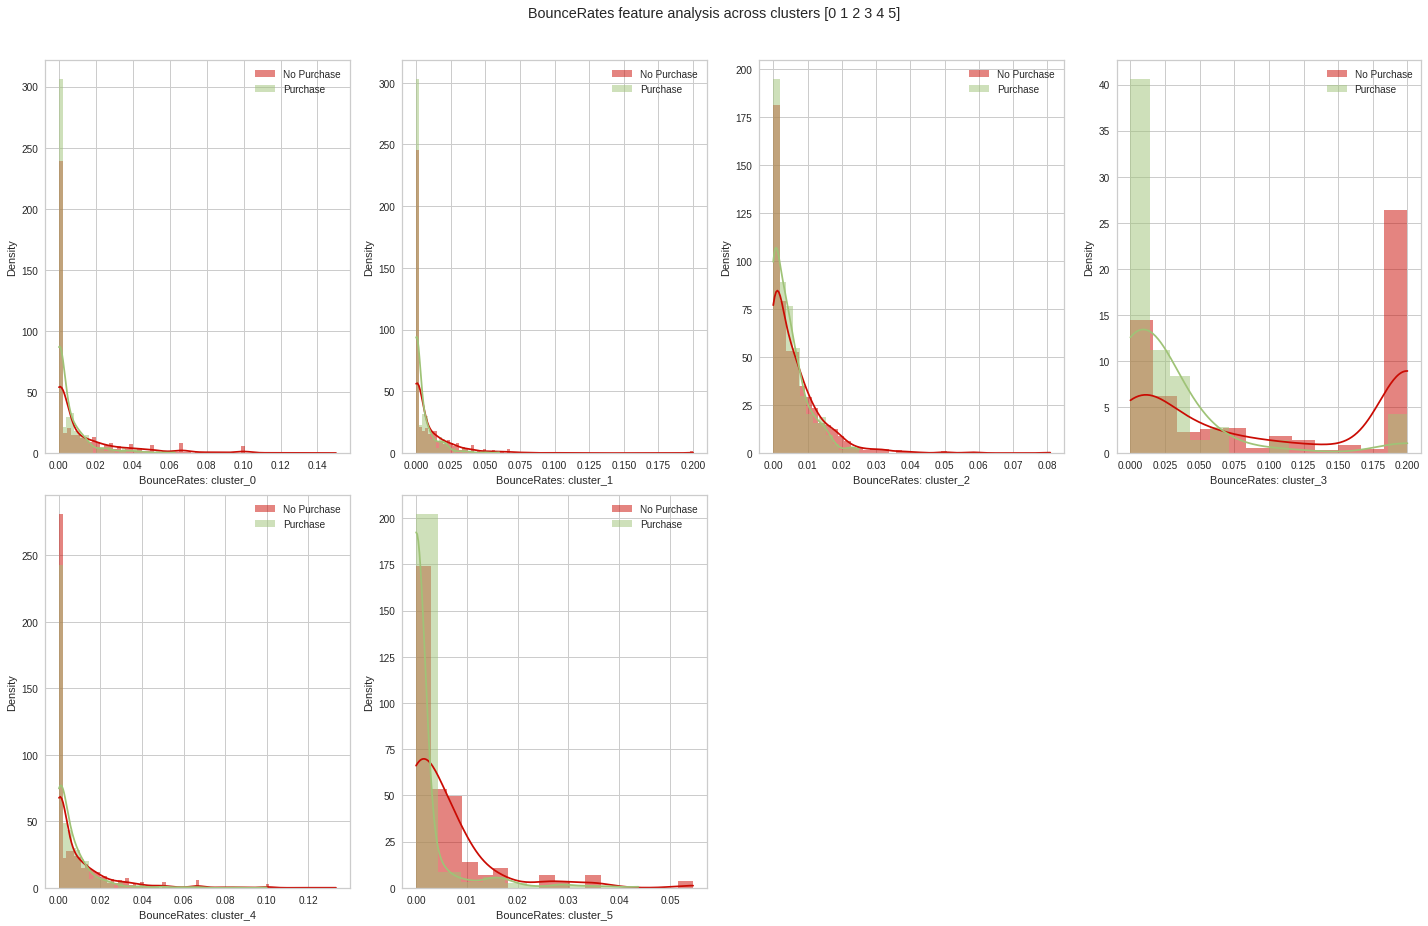

In [ ]:
# Feature 3 distribution in clusters
fid = 3

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

-  The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
- Bounce rates appear to follow a similar distribution pattern across all the clusters apart from cluster 3.
- The typical pattern shows high densities of purchasers & non-purchasers when bounce rates are low, which quickly taper off as bounce percentages increase.
- This happens in cluster 3, however when bounce rates = 0.2, the densities of purchasers & non-purchasers suddenly go up.  Cluster 3 represents sessions that have the lowest likelihood of purchasing, so the causes behind this could warrant further investigation to understand what is going on

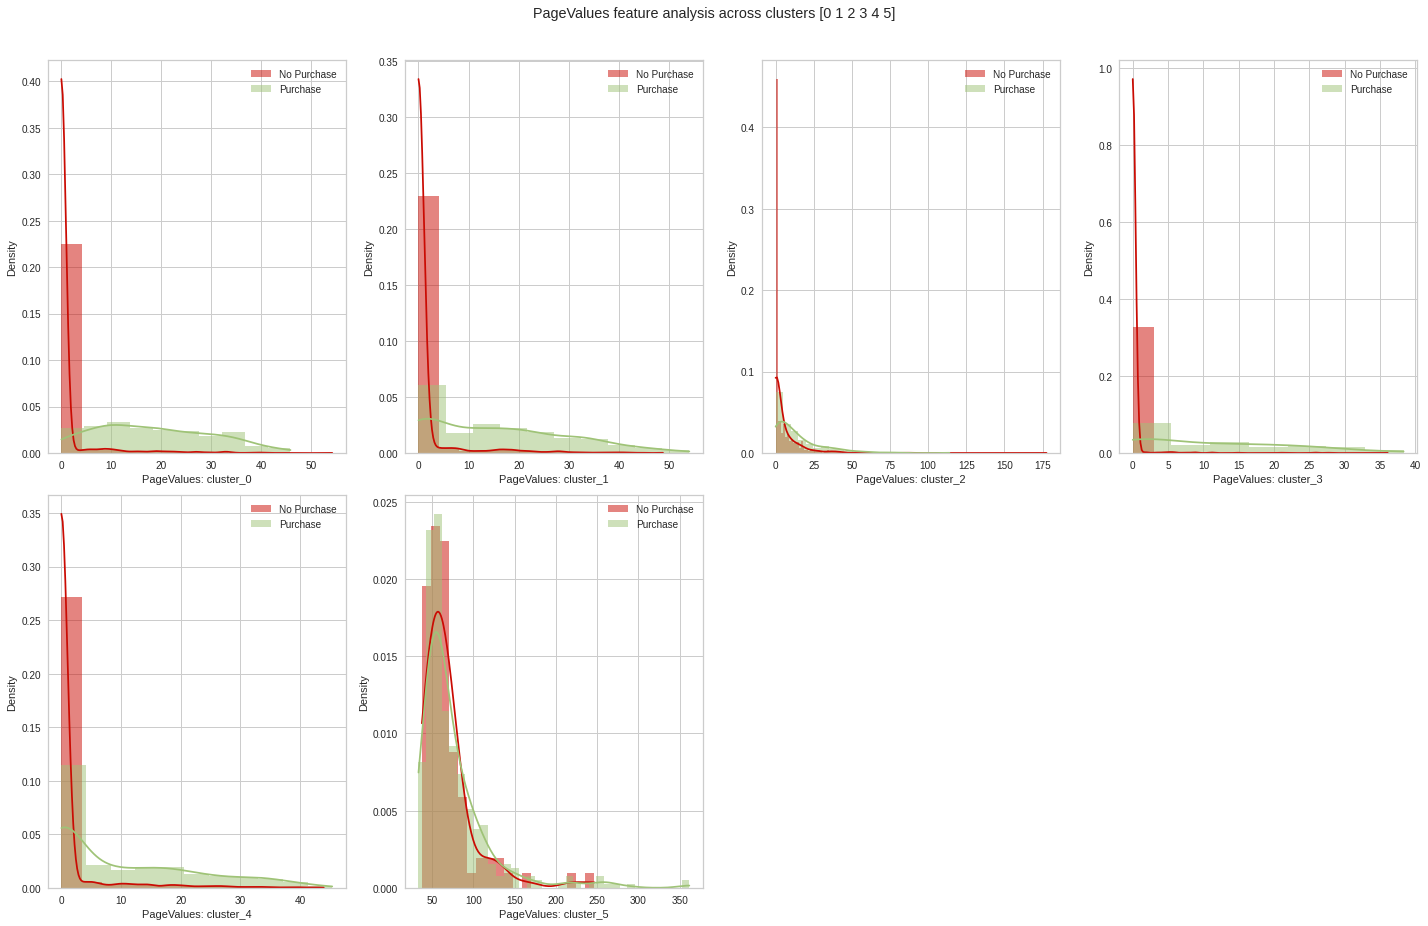

In [ ]:
# Feature 4 distribution in clusters
fid = 4

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
- The "Page Value" feature stood out during the feature ranking exercise as the most significant feature with an importance score of 0.376152, which was more than 4x the next highest ranked feature
- It is thus the most reliable feature to look at from a classification perspertive in terms of Purchase / No Purchase, and the above plots illustrate this as the density distribution patterns are similar across all the clusters.  This makes it a good proxy to use for classification purposes.
- As expected, clusters 2 & 5 (more likely to purchase) have densities at higher page values than low likelihood to buy clusters (0 & 3)

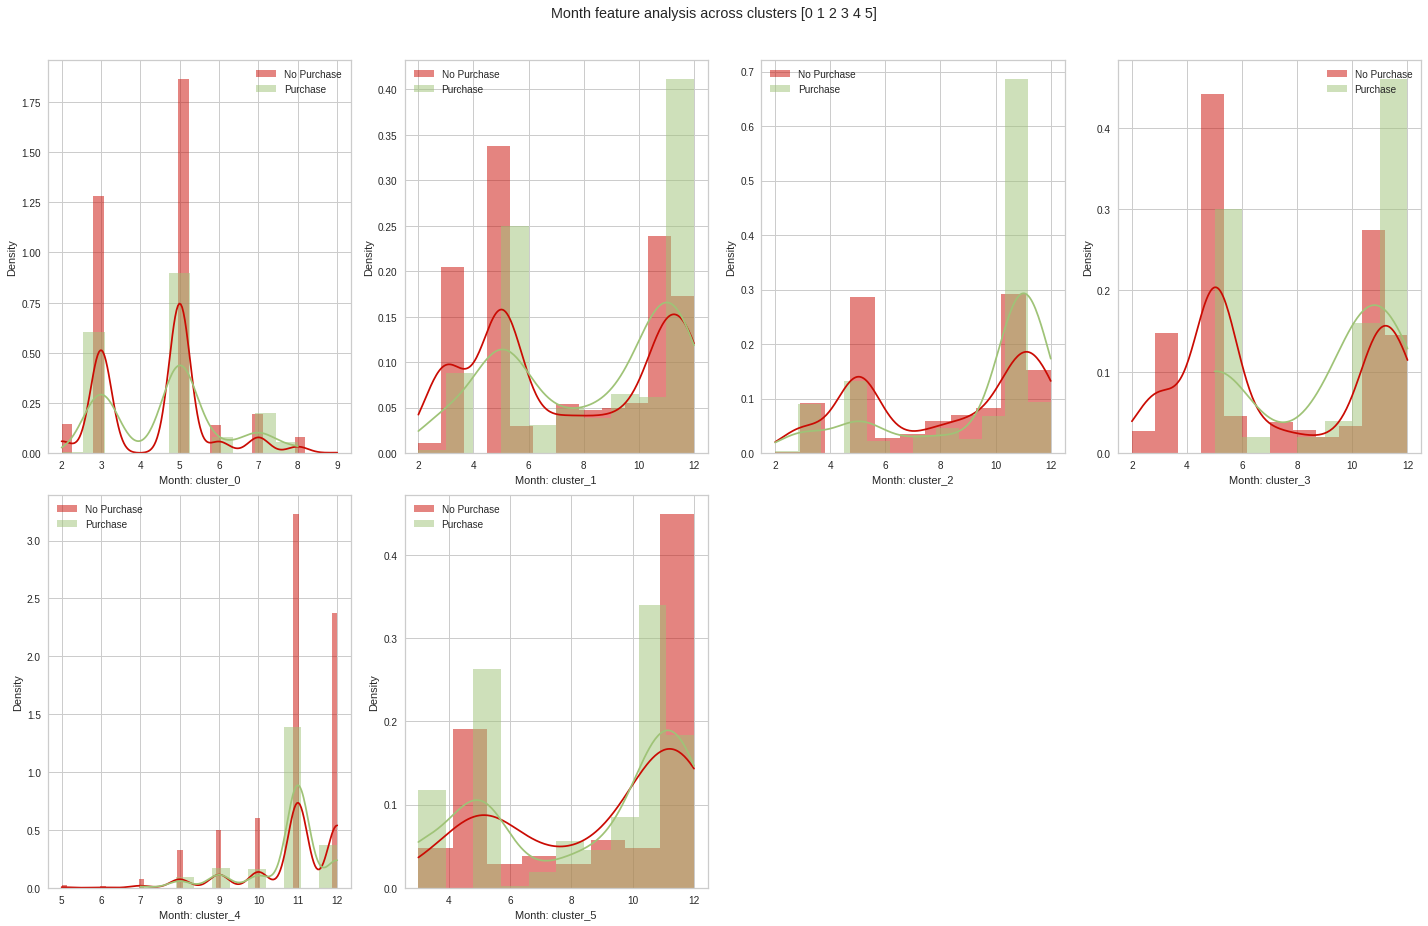

In [ ]:
# Feature 5 distribution in clusters
fid = 5

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- The above plots illustrate monthly buying behavior across the clusters
- They all differ to a certain degree which is a good thing as it potentially will allow marketing to target users in different clusters in a more time sensitive fashion with appropriate messaging / offers to increase sales

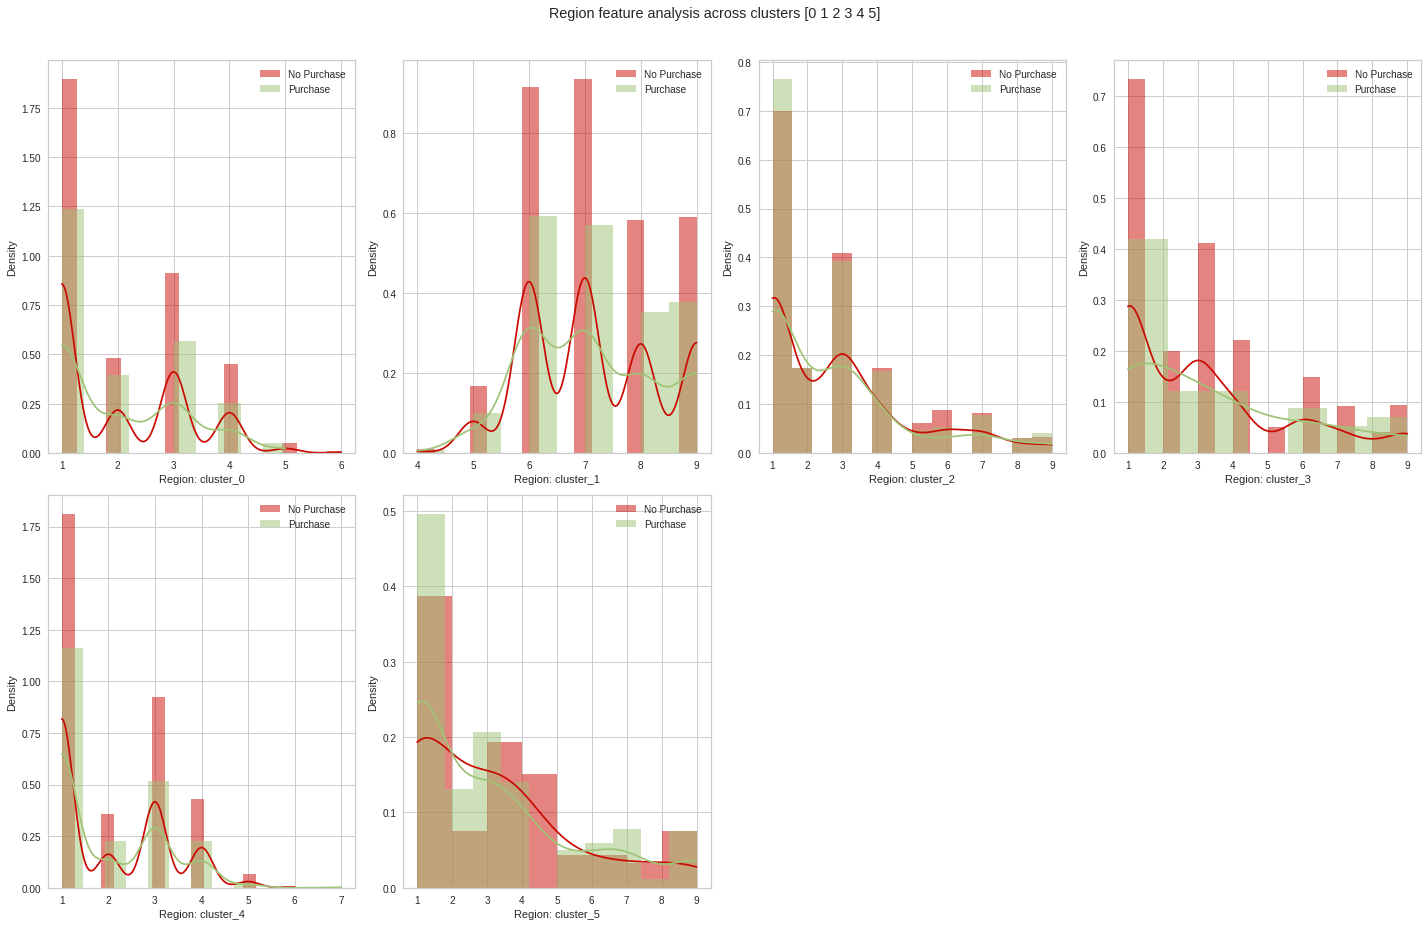

In [ ]:
# Feature 6 distribution in clusters
fid = 6

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- The above plots illustrate regional buying behavior across the clusters
- They all differ to a certain degree which is a good thing as it potentially will allow marketing to target users in different clusters with region specific messaging to improve sales / increase brand awareness

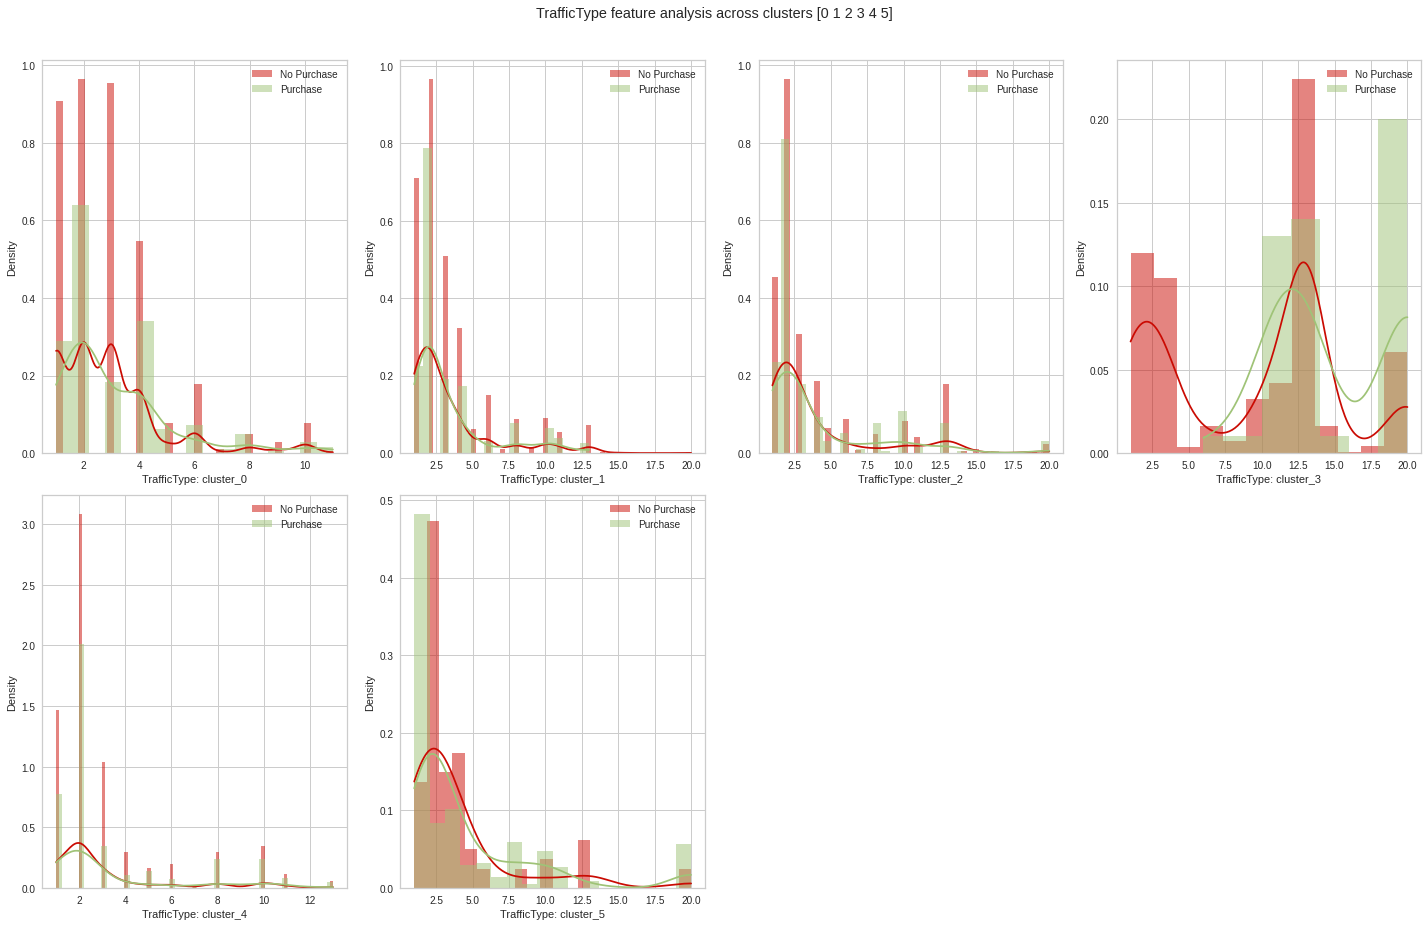

In [ ]:
# Feature 7 distribution in clusters
fid = 7

fig = plt.figure(figsize = (20, 25))
j=0
for i in list(unique_cluster_ids):
  item=X_train.columns[fid]
  result = X_train.loc[X_train['ClusterID']==i]
  plt.subplot(4, 4, j+1)
  j += 1
  sb.histplot(result[item][result['Revenue']==0], color='r', label = 'No Purchase', kde=True, stat="density", linewidth=0)
  sb.histplot(result[item][result['Revenue']==1], color='g', label = 'Purchase', kde=True, stat="density", linewidth=0)
  plt.xlabel(item+': cluster_'+str(i))
  plt.legend(loc='best')
fig.suptitle(item+' feature analysis across clusters '+str(unique_cluster_ids))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- The above plots illustrate the distribution of different traffic types across the vaious clusters
- There appears to be similar density & traffic value distributions for sessions belonging to the 'more likely to buy' clusters (2 & 5) 
- The same however cannot be said for the density & traffic value distributions for sessions belonging to the 'less likely to buy' clusters (0 & 3).  This could thus be an effective way of differentiating between the two non-buyer clusters  

# **Task 3:** Consider training data (with the 'Revenue' attribute) for records from June-Sept only. Assume for all records from Oct-Dec, that the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit a classifier. Report classification performance on Feb-March data set with and without the self-labeled data.

## 3.1) Correctly split the data by month into labeled, unlabeled, and test

In [ ]:
# Creat labeled, unlabeled & test dataframes

# df_all['Month']['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']-> [2,3,5,6,7,8,9,10,11,12]
df_june_sep = df_all[(df_all['Month']>=6) & (df_all['Month']<=9)]
df_oct_dec = df_all[df_all['Month']>=10]
df_feb_mar = df_all[df_all['Month']<=3]
df_lab_unlab = pd.concat([df_june_sep, df_oct_dec])

#Normalise data
scaler_lab = StandardScaler()
lab_unlab_norm = scaler_lab.fit_transform(df_lab_unlab)
june_sep_norm = scaler_lab.transform(df_june_sep)
oct_dec_norm = scaler_lab.transform(df_oct_dec)
feb_mar_norm = scaler_lab.transform(df_feb_mar)

print(f'june_sep_norm={june_sep_norm.shape}')
print(f'oct_dec_norm={oct_dec_norm.shape}')
print(f'feb_mar_norm={feb_mar_norm.shape}')

june_sep_norm=(1601, 18)
oct_dec_norm=(5274, 18)
feb_mar_norm=(2091, 18)


In [ ]:
X_lab = june_sep_norm[:,:-1]
X_unlab = oct_dec_norm[:,:-1]
X_test = feb_mar_norm[:,:-1]
y_lab = df_june_sep['Revenue'].values
y_unlab = df_oct_dec['Revenue'].values
y_test = df_feb_mar['Revenue'].values

print(f'X_lab={X_lab.shape}')
print(f'X_unlab={X_unlab.shape}')
print(f'X_test={X_test.shape}')

X_lab=(1601, 17)
X_unlab=(5274, 17)
X_test=(2091, 17)


## 3.2) Generate labels for unlabeled samples with a self labeling technique

In [ ]:
# Concatenate X_lab and X_unlab, calling this matrix X. These are the feature vectors for all samples.
X = np.concatenate((X_lab, X_unlab))
print(X.shape[0])

6875


In [ ]:
# Veracity check splits - should equal m_data (12330)
len(X_test)+len(X)+len(df_all[df_all['Month']==5])

12330

In [ ]:
#Create y. Make it a  kx1  column vector where  k  is the number of rows in X
y = np.concatenate((y_lab, np.ones((y_unlab.shape))*-1))#.reshape((-1,1))
y.shape

(6875,)

In [ ]:
#LabelSpreading model using a RBF kernel
from sklearn.semi_supervised import LabelSpreading
lp_model = LabelSpreading(gamma=42)
# Train the model
lp_model.fit(X, y)
# Get predictions
y_unlab_pred = lp_model.transduction_[X_lab.shape[0]:]

acc = accuracy(y_unlab, y_unlab_pred)
f1 = f1_score(y_unlab, y_unlab_pred)
print(f'f1_score={f1}, accuracy={acc}')

f1_score=0.328133405056482, accuracy=0.7631778536215397


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


In [ ]:
# Check portion of predicted labels == 1... should be around 15%
y_unlab_pred.sum()/len(y_unlab)

0.14562002275312855

In [ ]:
#LabelSpreading model using a KNN kernel
from sklearn.semi_supervised import LabelSpreading
best_f1_score = 0
lp_model=None
for i in range(2,15):
  label_prop_model = LabelSpreading(kernel='knn', alpha=0.01, n_neighbors=i)
  label_prop_model.fit(X,y)
  label_pred = label_prop_model.transduction_[X_lab.shape[0]:]
  f1 = f1_score(y_unlab, label_pred)
  if f1>best_f1_score:
    best_f1_score=f1
    params = label_prop_model.get_params()
    lp_model = label_prop_model
  print(f'[{i}], {f1}')
print(f"\nbest_f1_score: {best_f1_score:.4f}, best n_neighbors: {params['n_neighbors']}")

# Get predictions from lp_model with best_f1_score
y_unlab_pred = lp_model.transduction_[X_lab.shape[0]:]

acc = accuracy(y_unlab, y_unlab_pred)
f1 = f1_score(y_unlab, y_unlab_pred)
print(f'\nf1_score={f1}, accuracy={acc}')

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[2], 0.03900709219858156


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[3], 0.11910669975186103


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[4], 0.1893939393939394


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[5], 0.23863636363636362


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[6], 0.28571428571428575


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[7], 0.3226971703792896


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[8], 0.33838973162193703


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[9], 0.34162520729684903


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[10], 0.3424209378407852


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[11], 0.36934950385887544


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[12], 0.3626373626373626


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[13], 0.34116331096196867
[14], 0.33555555555555555

best_f1_score: 0.3693, best n_neighbors: 11

f1_score=0.36934950385887544, accuracy=0.783086841107319


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


In [ ]:
# Check portion of predicted labels == 1... should be around 15%
y_unlab_pred.sum()/len(y_unlab)

0.13708759954493743

**Label Propogation Results**

| Classifier      | F1 Score | Accuracy |
|------------|------------|------------|
| LabelSpreading(kernel='rbf', gamma=42) | 0.328133405056482 | 0.7631778536215397 |
| LabelSpreading(kernel='knn', n_neighbors=11) | 0.36934950385887544 | 0.783086841107319 | 


## 3.3) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

### 3.3.1) Classifier performance training on labeled data only

In [ ]:
#Setup relevant X,y train & test sets (normalised) 
X_train_norm = X_lab
X_test_norm = X_test
y_train = y_lab

print(f'X_train_norm={X_train_norm.shape}')
print(f'X_test_norm={X_test_norm.shape}')
print(f'y_train={y_train.shape}')
print(f'y_test={y_test.shape}')

X_train_norm=(1601, 17)
X_test_norm=(2091, 17)
y_train=(1601,)
y_test=(2091,)


Feature ranking:
1. feature 8 [PageValues] (0.288474)
2. feature 7 [ExitRates] (0.075708)
3. feature 4 [ProductRelated] (0.066688)
4. feature 1 [Administrative_Duration] (0.066085)
5. feature 0 [Administrative] (0.065144)
6. feature 5 [ProductRelated_Duration] (0.062889)
7. feature 13 [Region] (0.059854)
8. feature 14 [TrafficType] (0.050749)
9. feature 6 [BounceRates] (0.050017)
10. feature 10 [Month] (0.038647)
11. feature 12 [Browser] (0.037633)
12. feature 3 [Informational_Duration] (0.035514)
13. feature 11 [OperatingSystems] (0.033650)
14. feature 2 [Informational] (0.032496)
15. feature 16 [Weekend] (0.021189)
16. feature 15 [VisitorType] (0.015263)
17. feature 9 [SpecialDay] (0.000000)


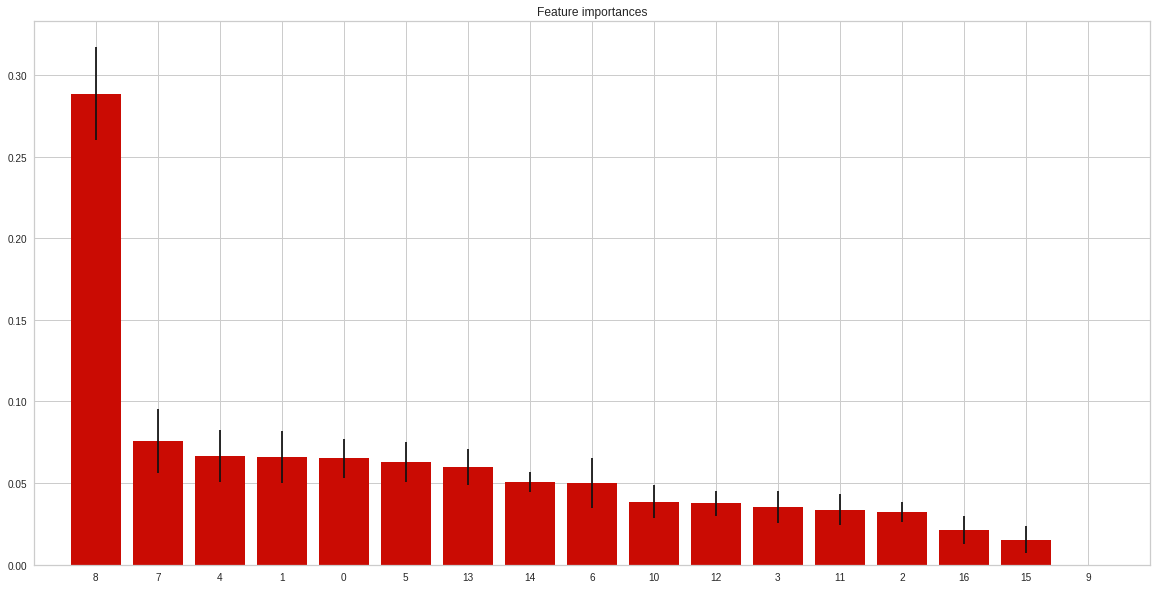

In [ ]:
# Use Random Forest to get feature ranks/importances for each feature  
from return_feature_rank_from_RF import return_feature_rank_from_RF

indices, importances = return_feature_rank_from_RF(X_train_norm, y_train, X_features)

In [ ]:
# Best model generator from Task 1: 
# Iterate through features from strongest to weakest, add next feature to the list only if it increases the target metric score
# Fine tune hyperparameters and record best model
top_f1=0
top_model, top_indices, top_features, top_params = None, None, None, None

for i in range(len(X_features)):
  if i==0: 
    reduced_lst=[indices[i]]
    temp_lst=reduced_lst
  else: temp_lst=reduced_lst+[indices[i]]
  reduced_features = []
  for j in temp_lst: reduced_features.append(X_features[j])
  X_train_reduced = X_train_norm[:, temp_lst]
  X_test_reduced = X_test_norm[:, temp_lst]
  print(f'\n[{i}] reduced_lst={temp_lst}, reduced_features={reduced_features}')
  print(f'[{i}] X_train_reduced={X_train_reduced.shape}, X_test_reduced={X_test_reduced.shape}')
  
  #Hyper-parameter fitting for Logistic Regression model
  param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                }

  #Instantiate, train, and predict with the Logistic Regression model:
  regb = LogisticRegression(random_state=0, class_weight='balanced')
  # Instantiate the grid search with the model and parameter grid
  grid = GridSearchCV(regb, param_grid, scoring='f1')
  # Train the grid of models
  grid.fit(X_train_reduced, y_train)
  # Print the parameters which yield the best model performance
  print(grid.best_params_)
  # Extract the model with the best performance from the grid search
  model = grid.best_estimator_
  # Use that model to make predictions with the test data
  y_pred = model.predict(X_test_reduced)
  acc = accuracy(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'[{i}]f1_score={f1}, accuracy={acc}')
  if f1>top_f1:
    top_f1=f1
    top_model=model
    top_indices=temp_lst
    top_features=reduced_features
    top_params=grid.best_params_
    reduced_lst=temp_lst 

print('\nBest model using feature selection and hyper-parameter fitting')
y_pred = top_model.predict(X_test_norm[:, top_indices])
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Hyer-parameters={top_params}')
print(f'top_features={top_features}, {top_indices} ({len(top_features)})')
print(f'f1_score={f1}, accuracy={acc}')


[0] reduced_lst=[8], reduced_features=['PageValues']
[0] X_train_reduced=(1601, 1), X_test_reduced=(2091, 1)
{'C': 1, 'solver': 'newton-cg'}
[0]f1_score=0.7470997679814385, accuracy=0.9478718316594931

[1] reduced_lst=[8, 7], reduced_features=['PageValues', 'ExitRates']
[1] X_train_reduced=(1601, 2), X_test_reduced=(2091, 2)
{'C': 0.05, 'solver': 'newton-cg'}
[1]f1_score=0.7589285714285714, accuracy=0.9483500717360115

[2] reduced_lst=[8, 7, 4], reduced_features=['PageValues', 'ExitRates', 'ProductRelated']
[2] X_train_reduced=(1601, 3), X_test_reduced=(2091, 3)
{'C': 0.5, 'solver': 'newton-cg'}
[2]f1_score=0.7606263982102909, accuracy=0.9488283118125299

[3] reduced_lst=[8, 7, 4, 1], reduced_features=['PageValues', 'ExitRates', 'ProductRelated', 'Administrative_Duration']
[3] X_train_reduced=(1601, 4), X_test_reduced=(2091, 4)
{'C': 0.5, 'solver': 'newton-cg'}
[3]f1_score=0.7527839643652561, accuracy=0.9469153515064562

[4] reduced_lst=[8, 7, 4, 0], reduced_features=['PageValues', 'E

### 3.3.2) Classifier performance training on labeled & self-labeled data

In [ ]:
#Setup relevant X,y train & test sets (normalised) 
X_train_norm = np.concatenate((X_lab, X_unlab), axis=0)
X_test_norm = X_test
y_train = np.concatenate((y_lab, y_unlab_pred), axis=0)

print(f'X_train_norm={X_train_norm.shape}')
print(f'X_test_norm={X_test_norm.shape}')
print(f'y_train={y_train.shape}')
print(f'y_test={y_test.shape}')

X_train_norm=(6875, 17)
X_test_norm=(2091, 17)
y_train=(6875,)
y_test=(2091,)


Feature ranking:
1. feature 8 [PageValues] (0.261368)
2. feature 7 [ExitRates] (0.073180)
3. feature 5 [ProductRelated_Duration] (0.063641)
4. feature 0 [Administrative] (0.063167)
5. feature 4 [ProductRelated] (0.062828)
6. feature 13 [Region] (0.061580)
7. feature 1 [Administrative_Duration] (0.055414)
8. feature 14 [TrafficType] (0.053552)
9. feature 6 [BounceRates] (0.049391)
10. feature 10 [Month] (0.047825)
11. feature 12 [Browser] (0.046777)
12. feature 11 [OperatingSystems] (0.038307)
13. feature 2 [Informational] (0.038279)
14. feature 3 [Informational_Duration] (0.038265)
15. feature 15 [VisitorType] (0.026606)
16. feature 16 [Weekend] (0.019820)
17. feature 9 [SpecialDay] (0.000000)


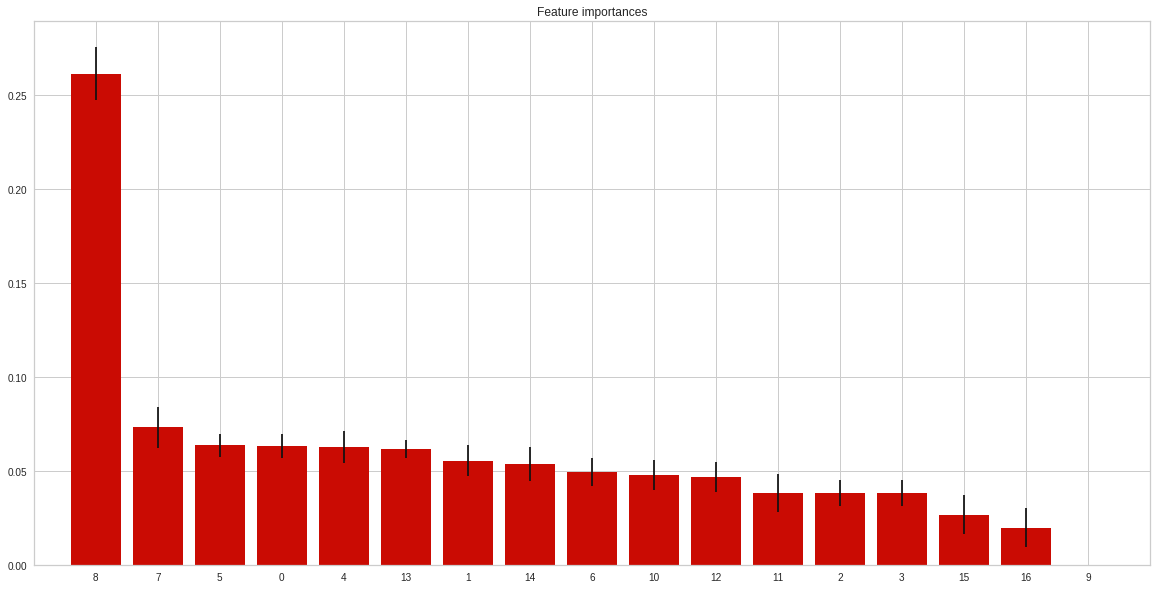

In [ ]:
# Use Random Forest to get feature ranks/importances for each feature  
from return_feature_rank_from_RF import return_feature_rank_from_RF

indices, importances = return_feature_rank_from_RF(X_train_norm, y_train, X_features)

In [ ]:
# Best model generator from Task 1: 
# Iterate through features from strongest to weakest, add next feature to the list only if it increases the target metric score
# Fine tune hyperparameters and record best model
top_f1=0
top_model, top_indices, top_features, top_params = None, None, None, None

for i in range(len(X_features)):
  if i==0: 
    reduced_lst=[indices[i]]
    temp_lst=reduced_lst
  else: temp_lst=reduced_lst+[indices[i]]
  reduced_features = []
  for j in temp_lst: reduced_features.append(X_features[j])
  X_train_reduced = X_train_norm[:, temp_lst]
  X_test_reduced = X_test_norm[:, temp_lst]
  print(f'\n[{i}] reduced_lst={temp_lst}, reduced_features={reduced_features}')
  print(f'[{i}] X_train_reduced={X_train_reduced.shape}, X_test_reduced={X_test_reduced.shape}')
  
  #Hyper-parameter fitting for Logistic Regression model
  param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                }

  #Instantiate, train, and predict with the Logistic Regression model:
  regb = LogisticRegression(random_state=0, class_weight='balanced')
  # Instantiate the grid search with the model and parameter grid
  grid = GridSearchCV(regb, param_grid, scoring='f1')
  # Train the grid of models
  grid.fit(X_train_reduced, y_train)
  # Print the parameters which yield the best model performance
  print(grid.best_params_)
  # Extract the model with the best performance from the grid search
  model = grid.best_estimator_
  # Use that model to make predictions with the test data
  y_pred = model.predict(X_test_reduced)
  acc = accuracy(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'[{i}]f1_score={f1}, accuracy={acc}')
  if f1>top_f1:
    top_f1=f1
    top_model=model
    top_indices=temp_lst
    top_features=reduced_features
    top_params=grid.best_params_
    reduced_lst=temp_lst 

print('\nBest model using feature selection and hyper-parameter fitting')
y_pred = top_model.predict(X_test_norm[:, top_indices])
acc = accuracy(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Hyer-parameters={top_params}')
print(f'top_features={top_features}, {top_indices} ({len(top_features)})')
print(f'f1_score={f1}, accuracy={acc}')


[0] reduced_lst=[8], reduced_features=['PageValues']
[0] X_train_reduced=(6875, 1), X_test_reduced=(2091, 1)
{'C': 0.01, 'solver': 'sag'}
[0]f1_score=0.7208121827411168, accuracy=0.9473935915829746

[1] reduced_lst=[8, 7], reduced_features=['PageValues', 'ExitRates']
[1] X_train_reduced=(6875, 2), X_test_reduced=(2091, 2)
{'C': 0.001, 'solver': 'newton-cg'}
[1]f1_score=0.7171717171717172, accuracy=0.9464371114299378

[2] reduced_lst=[8, 5], reduced_features=['PageValues', 'ProductRelated_Duration']
[2] X_train_reduced=(6875, 2), X_test_reduced=(2091, 2)
{'C': 0.005, 'solver': 'newton-cg'}
[2]f1_score=0.7116883116883117, accuracy=0.9469153515064562

[3] reduced_lst=[8, 0], reduced_features=['PageValues', 'Administrative']
[3] X_train_reduced=(6875, 2), X_test_reduced=(2091, 2)
{'C': 0.001, 'solver': 'sag'}
[3]f1_score=0.6826666666666668, accuracy=0.943089430894309

[4] reduced_lst=[8, 4], reduced_features=['PageValues', 'ProductRelated']
[4] X_train_reduced=(6875, 2), X_test_reduced=(2

### 3.3.3) Classifier Results when training on labeled data only vs labeled + self-labeled data

| Dataset  | Best Classifier  | F1 Score | Accuracy | Features |
|------------|------------|------------|------------|------------|
| Labeled only | LogisticRegression {'C': 0.1, 'solver': 'newton-cg'} | 0.7685393258426966 | 0.9507412721186035 | ['PageValues', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'Browser'], [8, 7, 4, 5, 6, 12] (6) |
| Labeled + self-labeled | LogisticRegression {'C': 0.001, 'solver': 'sag'} | 0.7660455486542443 | 0.9459588713534194 | ['PageValues', 'Month'], [8, 10] (2) |


- The classifier trained on the labeled only data performed slightly better in this instance on the test set
- The difference was neglible
- If it was possible to improve the accuracy of the label propogation algorithm, the combination of labeled + self-labeled data might change the result (in terms of test accuracy).
- The F1 scores here closely match the best achieved in task 1, which suggests that further improvements may be difficult